In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import KNNImputer
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import tensorflow_decision_forests as tfdf
from sklearn.metrics import mean_squared_error, r2_score

import torch
import torchvision
from torchvision import transforms
from torch.utils import data
from torch import nn
import torch.nn.functional as F
import tensorflow_decision_forests as tfdf

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns=100
pd.options.display.max_rows=100


2024-05-05 17:10:05.936591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#!pip install sklearn_features
#!pip install tensorflow_decision_forests
#!pip install catboost

## Feature Understanding

In [3]:
path = "data/"

In [4]:
df = pd.read_csv(path+"train.csv").drop("Id",axis=1)

In [5]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


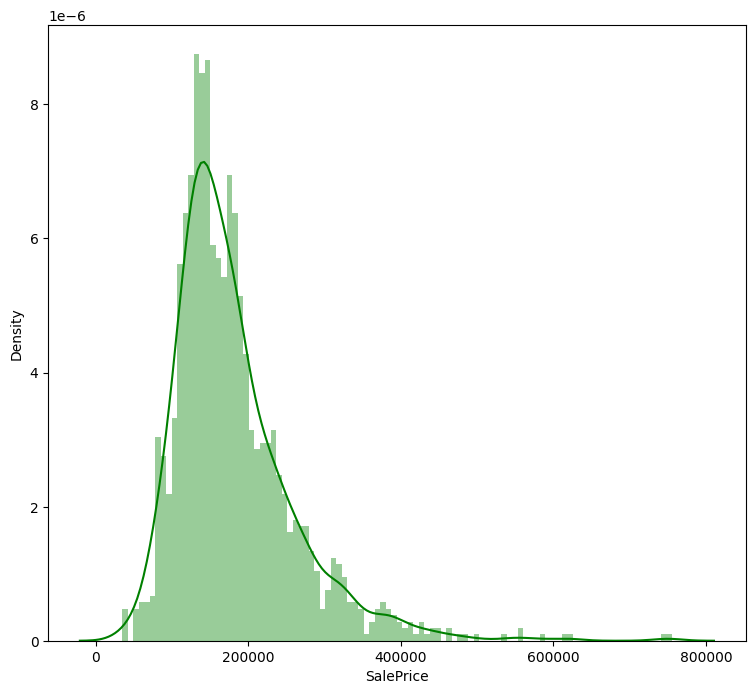

In [8]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [9]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

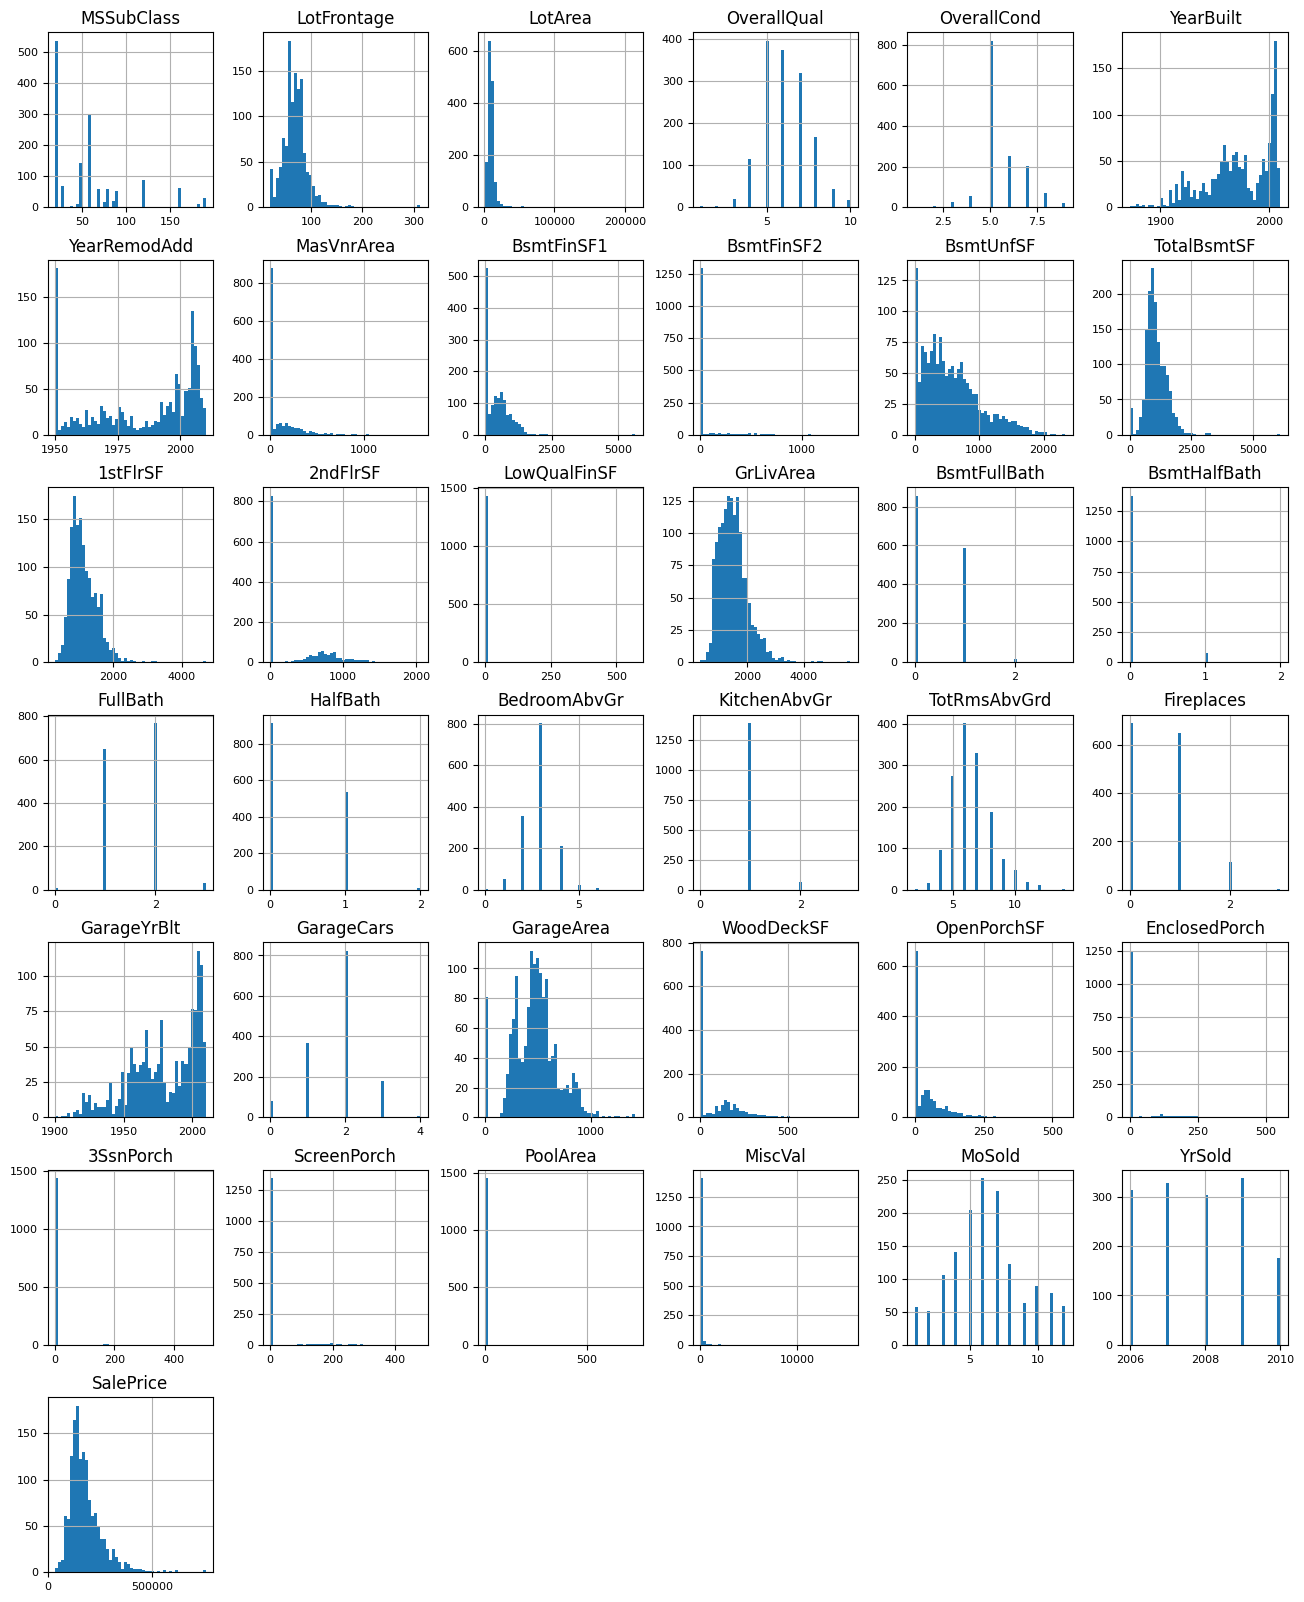

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [12]:
def find_col_dtypes(data, ord_th):

    num_cols = data.select_dtypes("number").columns.to_list()
    cat_cols = data.select_dtypes("object").columns.to_list()

    ordinals = [col for col in num_cols if data[col].nunique() < ord_th]

    num_cols = [col for col in num_cols if col not in ordinals]

    return num_cols, ordinals, cat_cols

In [13]:
num_cols, ordinals, cat_cols = find_col_dtypes(df, 20)

print(f"Num Cols: {num_cols}", end="\n\n")
print(f"Cat Cols: {cat_cols}", end="\n\n")
print(f"Ordinal Cols: {ordinals}")

Num Cols: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']

Cat Cols: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Ordinal Cols: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', '

In [14]:
df.duplicated().sum()

0

In [15]:
df["SalePrice"].quantile([0,0.25,0.50,0.75])

0.00     34900.0
0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [16]:
df["SalePrice_Range"] = pd.cut(df["SalePrice"],
                                 bins=np.array([-np.inf, 100, 150, 200, np.inf])*1000,
                                 labels=["0-100k","100k-150k","150k-200k","200k+"])

In [17]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%',
            explode=([.05]*(df[col].nunique()-1)+[.5]),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'},
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "twilight_shifted", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        ax[1].text(p-0.17, count+(np.sqrt(count)), count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

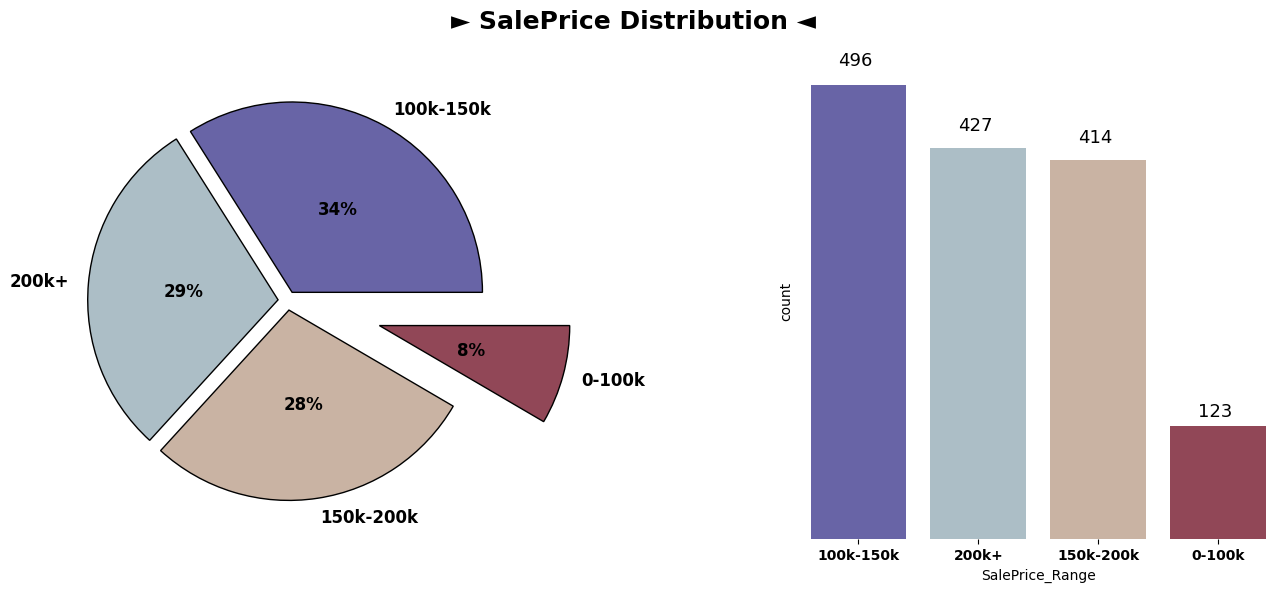

In [18]:
plot_target(df,
            col="SalePrice_Range",
            title="SalePrice",
            pie_colors=["#6864a6","#acbec6","#c9b3a3","#914757","#f3f3af","#c0ebe9"])

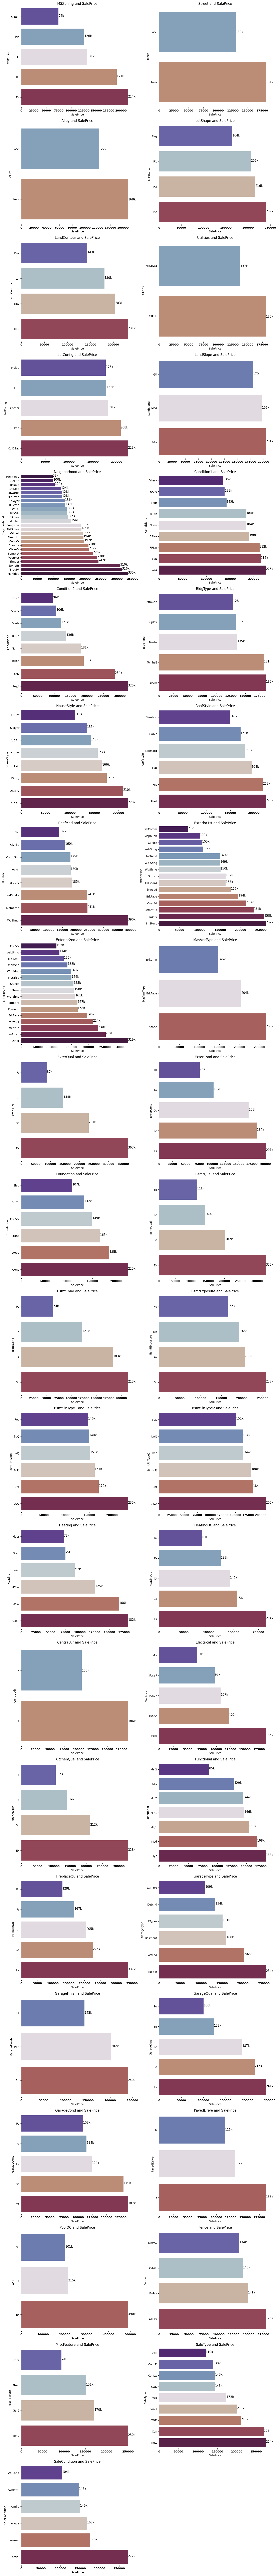

In [19]:
target = "SalePrice"

plt.figure(figsize=(14,len(cat_cols)*3))
for idx,column in enumerate(cat_cols):
    data = df.groupby(column)[target].mean().reset_index().sort_values(by=target)
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.barplot(y=column, x=target, data=data, palette="twilight_shifted")
    for p, count in enumerate(data[target].values,0):
        plt.text(count + 10, p+0.05/len(data), f"{int(count//1000)}k", color='black', fontsize=11)
    plt.title(f"{column} and {target}")
    plt.xticks(fontweight='bold')
    plt.box(False)
    plt.tight_layout()

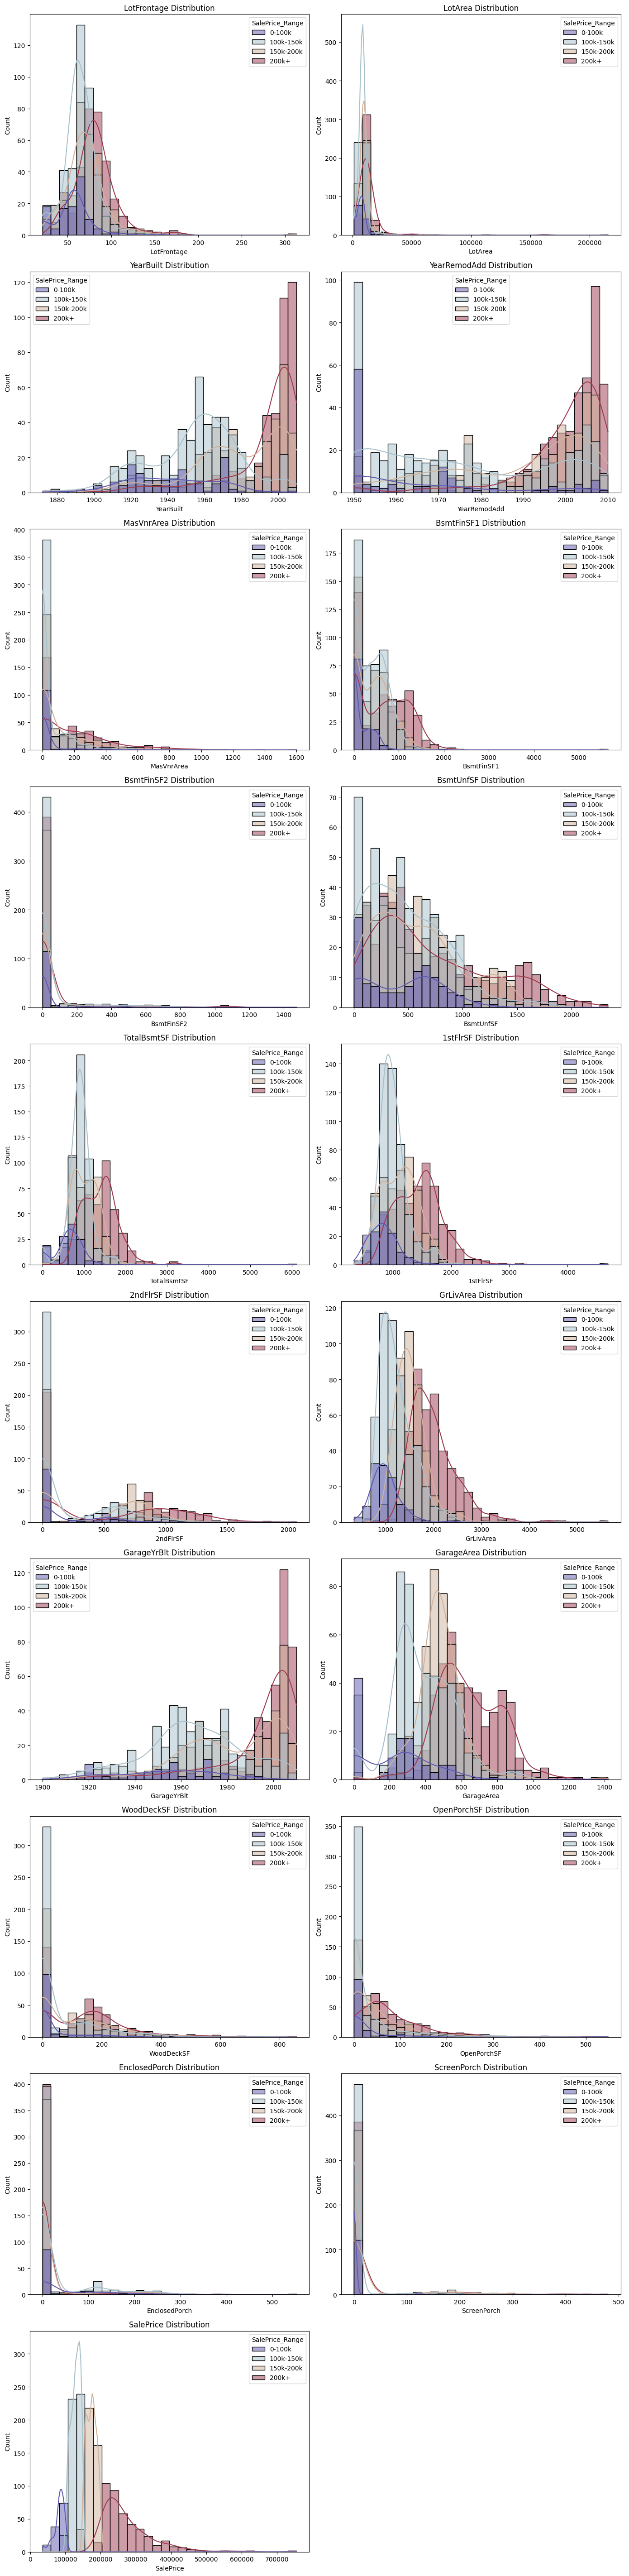

In [20]:
num_cols = df[num_cols].columns[df[num_cols].nunique() > 25]

plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="SalePrice_Range", data=df,bins=30,kde=True, palette="twilight_shifted")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [21]:
df.describe([0.01,0.99]).T

count           mean           std      min        1%  \
MSSubClass     1460.0      56.897260     42.300571     20.0     20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0     21.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0   1680.00   
OverallQual    1460.0       6.099315      1.382997      1.0      3.00   
OverallCond    1460.0       5.575342      1.112799      1.0      3.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0   1899.18   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0   1950.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0      0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0      0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0      0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0      0.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0      0.00   
1stFlrSF       1460.0    1162.626712    386.587738    334.0    520.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0      0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0      0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    692.18   
BsmtFullBath   1460.0       0.425342      0.518911      0.0      0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0      0.00   
FullBath       1460.0       1.565068      0.550916      0.0      1.00   
HalfBath       1460.0       0.382877      0.502885      0.0      0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0      1.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0      1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0      3.00   
Fireplaces     1460.0       0.613014      0.644666      0.0      0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0   1916.00   
GarageCars     1460.0       1.767123      0.747315      0.0      0.00   
GarageArea     1460.0     472.980137    213.804841      0.0      0.00   
WoodDeckSF     1460.0      94.244521    125.338794      0.0      0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0      0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0      0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0      0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0      0.00   
PoolArea       1460.0       2.758904     40.177307      0.0      0.00   
MiscVal        1460.0      43.489041    496.123024      0.0      0.00   
MoSold         1460.0       6.321918      2.703626      1.0      1.00   
YrSold         1460.0    2007.815753      1.328095   2006.0   2006.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  61815.97   

                    50%        99%       max  
MSSubClass         50.0     190.00     190.0  
LotFrontage        69.0     141.00     313.0  
LotArea          9478.5   37567.64  215245.0  
OverallQual         6.0      10.00      10.0  
OverallCond         5.0       9.00       9.0  
YearBuilt        1973.0    2009.00    2010.0  
YearRemodAdd     1994.0    2009.00    2010.0  
MasVnrArea          0.0     791.92    1600.0  
BsmtFinSF1        383.5    1572.41    5644.0  
BsmtFinSF2          0.0     830.38    1474.0  
BsmtUnfSF         477.5    1797.05    2336.0  
TotalBsmtSF       991.5    2155.05    6110.0  
1stFlrSF         1087.0    2219.46    4692.0  
2ndFlrSF            0.0    1418.92    2065.0  
LowQualFinSF        0.0     360.00     572.0  
GrLivArea        1464.0    3123.48    5642.0  
BsmtFullBath        0.0       2.00       3.0  
BsmtHalfBath        0.0       1.00       2.0  
FullBath            2.0       3.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       5.00       8.0  
KitchenAbvGr        1.0       2.00       3.0  
TotRmsAbvGrd        6.0      11.00      14.0  
Fireplaces          1.0       2.00       3.0  
GarageYrBlt      1980.0    2009.00    2010.0  
GarageCars         

## Data Cleaning

In [22]:
def outliner_detector(df, cols, take_care_outliners=False, print_outliners=False, q_1=0.25, q_3=0.75):

    temp = pd.DataFrame()
    data = df.copy()

    for col in cols:

        q1 = data[col].quantile(q_1)
        q3 = data[col].quantile(q_3)
        IQR = q3 - q1
        up = q3 + 1.5 * IQR
        low = q1 - 1.5 * IQR
        temp.loc[col, "Min"] = round(data[col].min())
        temp.loc[col, "Low_Limit"] = round(low)
        temp.loc[col, "Mean"] = round(data[col].mean())
        temp.loc[col, "Median"] = round(data[col].median())
        temp.loc[col,"Up_Limit"] = up
        temp.loc[col, "Max"] = data[col].max()
        temp.loc[col, "Outliner"] = "Min-Max-Outliner" if (data[col].max() > up) & (low > data[col].min())\
                                    else ("Max-Outliner" if data[col].max() > up \
                                    else ("Min-Outliner" if low > data[col].min() \
                                    else "No"))
        if take_care_outliners:
            data.loc[data[col] > up,col] = round(up-1)
            data.loc[data[col] < low,col] = round(low+1)
    if take_care_outliners:
        if print_outliners: return temp
        return data
    if print_outliners: return temp

In [23]:
df = outliner_detector(df, num_cols, take_care_outliners= True, print_outliners=False, q_1=0.01, q_3=0.99)
outliner_detector(df, num_cols, print_outliners=True, q_1=0.01, q_3=0.99)

Min  Low_Limit      Mean    Median     Up_Limit       Max  \
LotFrontage       21.0     -159.0      70.0      69.0      321.000     313.0   
LotArea         1300.0   -52151.0   10319.0    9478.0    91399.100   91398.0   
YearBuilt       1872.0     1734.0    1971.0    1973.0     2173.730    2010.0   
YearRemodAdd    1950.0     1862.0    1985.0    1994.0     2097.500    2010.0   
MasVnrArea         0.0    -1188.0     104.0       0.0     1979.800    1600.0   
BsmtFinSF1         0.0    -2359.0     442.0     384.0     3931.025    3930.0   
BsmtFinSF2         0.0    -1246.0      47.0       0.0     2075.950    1474.0   
BsmtUnfSF          0.0    -2696.0     567.0     478.0     4492.625    2336.0   
TotalBsmtSF        0.0    -3233.0    1057.0     992.0     5387.625    5387.0   
1stFlrSF         334.0    -2029.0    1163.0    1087.0     4768.650    4692.0   
2ndFlrSF           0.0    -2128.0     347.0       0.0     3547.300    2065.0   
GrLivArea        334.0    -2955.0    1515.0    1464.0     6770.430    5642.0   
GarageYrBlt     1900.0     1776.0    1979.0    1980.0     2148.500    2010.0   
GarageArea         0.0    -1504.0     473.0     480.0     2506.975    1418.0   
WoodDeckSF         0.0     -758.0      94.0       0.0     1263.650     857.0   
OpenPorchSF        0.0     -429.0      47.0      25.0      714.550     547.0   
EnclosedPorch      0.0     -392.0      22.0       0.0      652.625     552.0   
ScreenPorch        0.0     -402.0      15.0       0.0      670.125     480.0   
SalePrice      34900.0  -509311.0  180921.0  163000.0  1013693.570  755000.0   

              Outliner  
LotFrontage         No  
LotArea             No  
YearBuilt           No  
YearRemodAdd        No  
MasVnrArea          No  
BsmtFinSF1          No  
BsmtFinSF2          No  
BsmtUnfSF           No  
TotalBsmtSF         No  
1stFlrSF            No  
2ndFlrSF            No  
GrLivArea           No  
GarageYrBlt         No  
GarageArea          No  
WoodDeckSF          No  
OpenPorchSF         No  
EnclosedPorch       No  
ScreenPorch         No  
SalePrice           No

In [24]:
def mice_imput(df:pd.DataFrame, fill:str, based:list) -> pd.Series :

    categoric_cols = [col for col in based if df[col].dtype == "O"]

    temp_df = pd.get_dummies(df[[fill] + based].copy(), columns=categoric_cols)

    missing_mask = temp_df.isna()

    imputer = IterativeImputer(max_iter=10, random_state=42)

    imputed_values = imputer.fit_transform(temp_df)

    temp_df[fill][temp_df[fill].isnull()] = imputed_values[missing_mask]

    return temp_df[fill]

In [25]:
def summarize_missing_values(df):
    total_entries = len(df)
    missing_values_count = df.isnull().sum()
    missing_values_percentage = (missing_values_count / total_entries) * 100

    missing_values_df = pd.DataFrame({
        'Count': missing_values_count,
        'Percentage': missing_values_percentage
    })
    missing_values_df = missing_values_df[missing_values_df['Count'] > 0]
    missing_values_df.sort_values(by='Count', ascending=False, inplace=True)
    return missing_values_df


In [26]:
summarize_missing_values(df)

Count  Percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageCond       81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtFinType1     37    2.534247
BsmtCond         37    2.534247
BsmtQual         37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493

In [27]:
df["LotFrontage"] = mice_imput(df, fill="LotFrontage", based=["LotArea","LotShape","LotConfig"])
df.loc[df["MasVnrArea"].isnull(),["MasVnrArea"]] = 0
df.loc[df["BsmtFinSF1"].isnull(),["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]] = 0
df.loc[df["GarageYrBlt"].isnull(),"GarageYrBlt"] = 0
df.loc[df["GarageArea"].isnull(),"GarageArea"] = 0
df[cat_cols] = df[cat_cols].fillna("None")
df[ordinals] = df[ordinals].fillna(0)

In [28]:
summarize_missing_values(df)

Empty DataFrame
Columns: [Count, Percentage]
Index: []

## Feature Engineering

In [29]:
def new_features(df):
    df['TotalArea'] = df['TotalBsmtSF'] + df['GrLivArea']

    df['TotalBathrooms'] = df['FullBath'] + df['HalfBath']*0.5 + df["BsmtHalfBath"]*0.5 + df["BsmtFullBath"]

    df['TotalRooms'] = df['BedroomAbvGr'] + df['TotRmsAbvGrd']

    df['HasPool'] = [pool if pool > 0 else 0 for pool in df["PoolArea"]]

    df['TotalPorchArea'] = (df['OpenPorchSF'] + df['EnclosedPorch'] +
                            df["3SsnPorch"] + df["ScreenPorch"] + df["WoodDeckSF"])

    df['HasGarage'] = [gar if gar > 0 else 0 for gar in df["GarageYrBlt"]]

    df['Overal'] = df['OverallQual'] + df['OverallCond']

    df['ProximityToSocialAmenities'] = df['OverallQual'] * df['LotArea']


new_features(df)

df[["TotalArea","TotalBathrooms","TotalRooms","HasPool","TotalPorchArea","HasGarage","Overal",'ProximityToSocialAmenities']].head()

TotalArea  TotalBathrooms  TotalRooms  HasPool  TotalPorchArea  HasGarage  \
0       2566             3.5          11        0              61     2003.0   
1       2524             2.5           9        0             298     1976.0   
2       2706             3.5           9        0              42     2001.0   
3       2473             2.0          10        0             307     1998.0   
4       3343             3.5          13        0             276     2000.0   

   Overal  ProximityToSocialAmenities  
0      12                       59150  
1      14                       57600  
2      12                       78750  
3      12                       66850  
4      13                      114080

## Skewness correction

In [30]:
def correct_skewed(data, num_col):

    skewed_column = []
    for col in num_col:
        if np.abs(skew(data[col])) > 0.5:
            data[col]= np.log1p(data[col])
    return data

In [31]:
num_cols.drop(["SalePrice"])
df_nonskewed = correct_skewed(df.copy(), num_cols)

In [32]:
df_nonskewed

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0             60       RL     4.189655  9.042040   Pave  None      Reg   
1             20       RL     4.394449  9.169623   Pave  None      Reg   
2             60       RL     4.234107  9.328212   Pave  None      IR1   
3             70       RL     4.110874  9.164401   Pave  None      IR1   
4             60       RL     4.442651  9.565284   Pave  None      IR1   
...          ...      ...          ...       ...    ...   ...      ...   
1455          60       RL     4.143135  8.976894   Pave  None      Reg   
1456          20       RL     4.454347  9.486152   Pave  None      Reg   
1457          70       RL     4.204693  9.109746   Pave  None      Reg   
1458          20       RL     4.234107  9.181735   Pave  None      Reg   
1459          20       RL     4.330733  9.204121   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5   7.602900   
1          Norm     1Fam     1Story            6            8   7.589336   
2          Norm     1Fam     2Story            7            5   7.601902   
3          Norm     1Fam     2Story            7            5   7.557995   
4          Norm     1Fam     2Story            8            5   7.601402   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5   7.600902   
1456       Norm     1Fam     1Story            6            6   7.590347   
1457       Norm     1Fam     2Story            7            9   7.571474   
1458       Norm     1Fam     1Story            5            6   7.576097   
1459       Norm     1Fam     1Story            5            6   7.583756   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0         7.602900     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1         7.589336     Gable  CompShg     MetalSd     MetalSd       None   
2         7.602401     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3         7.586296     Gable  CompShg     Wd Sdng     Wd Shng       None   
4         7.601402     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455      7.601402     Gable  CompShg     VinylSd     VinylSd       None   
1456      7.595387     Gable  CompShg     Plywood     Plywood      Stone   
1457      7.604396     Gable  CompShg     CemntBd     CmentBd       None   
1458      7.599401       Hip  CompShg     MetalSd     MetalSd       None   
1459      7.583756     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       5.283204        Gd        TA      PConc       Gd       TA   
1       0.000000        TA        TA     CBlock       Gd       TA   
2       5.093750        Gd        TA      PConc       Gd       TA   
3       0.000000        TA        TA     BrkTil       TA       Gd   
4       5.860786        Gd        TA      PConc       Gd 

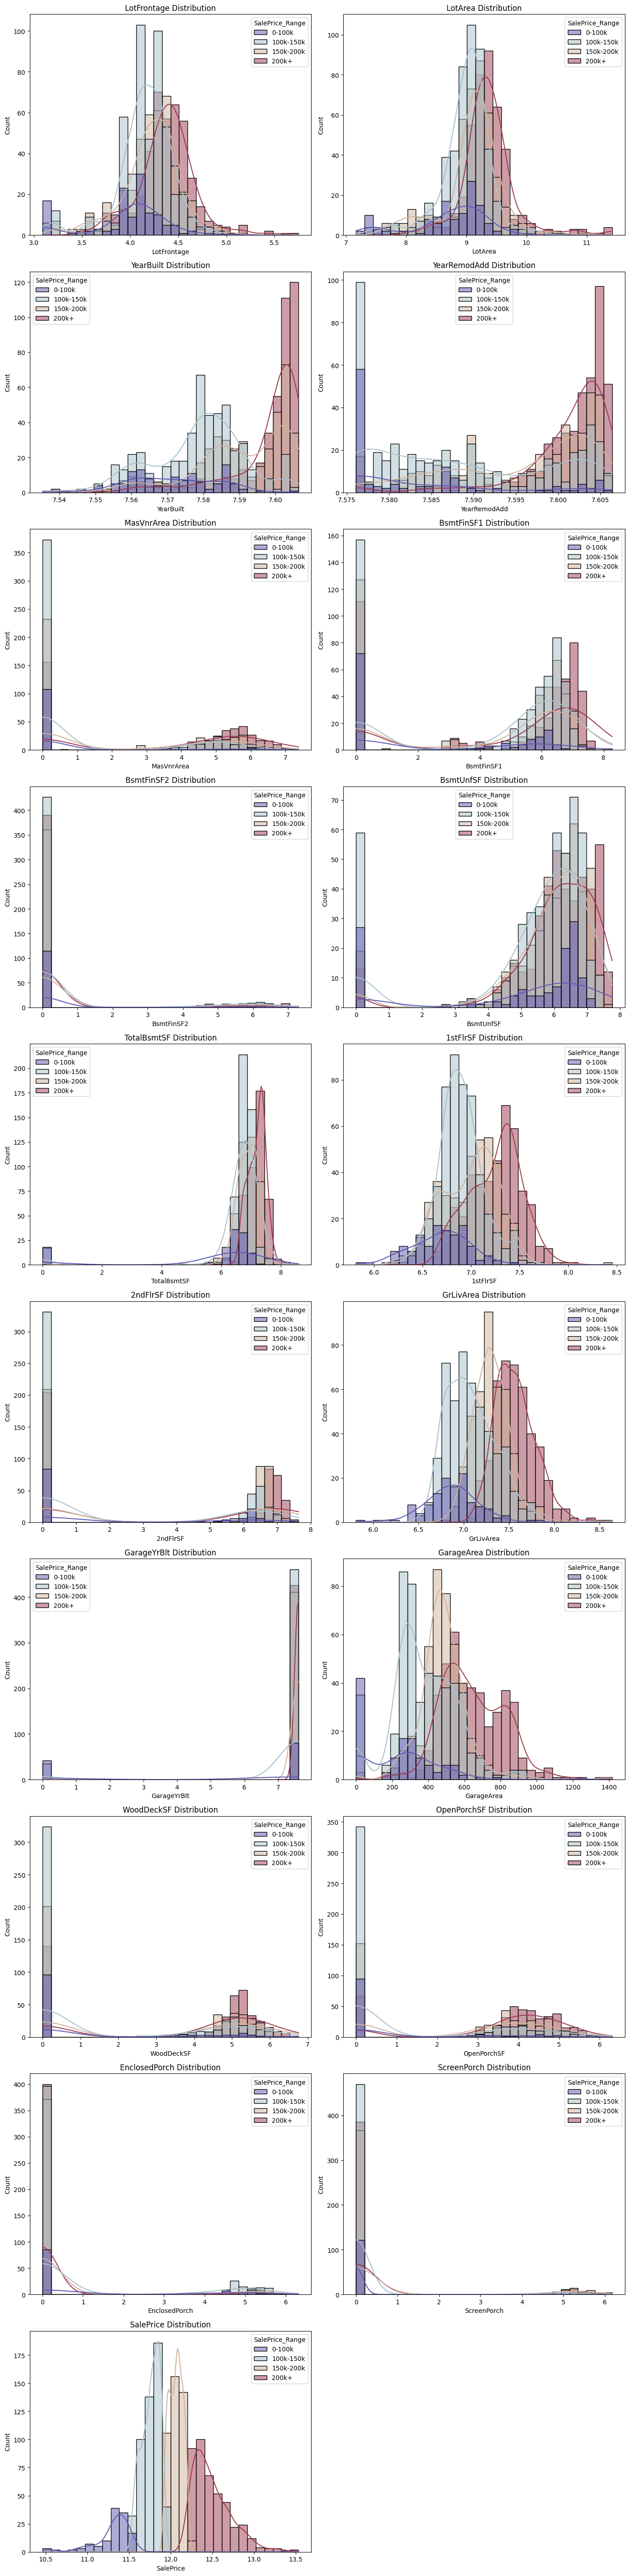

In [33]:
num_cols = df_nonskewed[num_cols].columns[df_nonskewed[num_cols].nunique() > 25]

plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="SalePrice_Range", data=df_nonskewed,bins=30,kde=True, palette="twilight_shifted")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [34]:
df.drop(["SalePrice_Range"], axis=1, inplace=True)
df_nonskewed.drop(["SalePrice_Range"], axis=1, inplace=True)

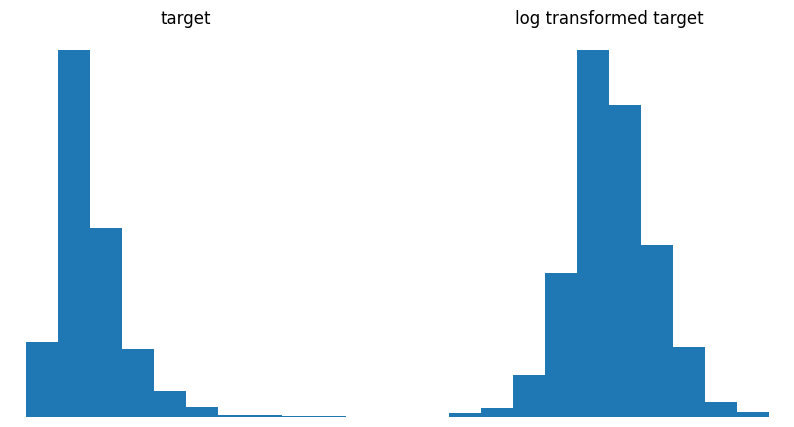

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df["SalePrice"])
plt.title('target')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(np.log(df["SalePrice"]))
plt.title('log transformed target')
plt.axis('off')

plt.show()

In [36]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## One hot encoding

In [37]:
df_dummy = pd.get_dummies(df_nonskewed, columns=cat_cols, dtype=int)

In [38]:
df_dummy

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0             60     4.189655  9.042040            7            5   7.602900   
1             20     4.394449  9.169623            6            8   7.589336   
2             60     4.234107  9.328212            7            5   7.601902   
3             70     4.110874  9.164401            7            5   7.557995   
4             60     4.442651  9.565284            8            5   7.601402   
...          ...          ...       ...          ...          ...        ...   
1455          60     4.143135  8.976894            6            5   7.600902   
1456          20     4.454347  9.486152            6            6   7.590347   
1457          70     4.204693  9.109746            7            9   7.571474   
1458          20     4.234107  9.181735            5            6   7.576097   
1459          20     4.330733  9.204121            5            6   7.583756   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         7.602900    5.283204    6.561031    0.000000   5.017280   
1         7.589336    0.000000    6.886532    0.000000   5.652489   
2         7.602401    5.093750    6.188264    0.000000   6.075346   
3         7.586296    0.000000    5.379897    0.000000   6.293419   
4         7.601402    5.860786    6.486161    0.000000   6.196444   
...            ...         ...         ...         ...        ...   
1455      7.601402    0.000000    0.000000    0.000000   6.860664   
1456      7.595387    4.787492    6.673298    5.099866   6.380123   
1457      7.604396    0.000000    5.620401    0.000000   6.777647   
1458      7.599401    0.000000    3.912023    6.937314   0.000000   
1459      7.583756    0.000000    6.722630    5.673323   4.919981   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.753438  6.753438  6.751101             0   7.444833             1   
1        7.141245  7.141245  0.000000             0   7.141245             0   
2        6.825460  6.825460  6.765039             0   7.488294             1   
3        6.629363  6.869014  6.629363             0   7.448916             1   
4        7.044033  7.044033  6.960348             0   7.695758             1   
...           ...       ...       ...           ...        ...           ...   
1455     6.860664  6.860664  6.543912             0   7.407318             0   
1456     7.341484  7.637234  0.000000             0   7.637234             1   
1457     7.050123  7.080868  7.050123             0   7.758333             0   
1458     6.983790  6.983790  0.000000             0   6.983790             1   
1459     7.136483  7.136483  0.000000             0   7.136483             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0     7.602900           2         548   
1                6           1     7.589336           2         460   
2                6           1     7.601902           2         608   
3                7           1     7.600402           3         642   
4                9           1     7.601402           3    

In [39]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 312 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(20), int64(292)
memory usage: 3.5 MB


In [40]:
df_dummy.columns = [col.replace(" ", "_") for col in df_dummy.columns]
df_dummy["SalePrice"] = np.log(df_dummy["SalePrice"])

## Model Evulation

In [41]:
y = df_dummy['SalePrice']
X = df_dummy.drop(['SalePrice'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 311), (292, 311), (1168,), (292,))

In [44]:
models = {
    'Linear Regression': Pipeline([
        ('regressor', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('regressor', RandomForestRegressor())
    ]),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=10, loss_function='RMSE', verbose=200),
    'LightGBM': Pipeline([
        ('regressor', LGBMRegressor())
    ]),
    'XGBoost': Pipeline([
        ('regressor', XGBRegressor(objective='reg:squarederror'))
    ]),
    'TFDF': tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)
}


Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmphc58krhz as temporary training directory


[WARNING 24-05-05 17:11:49.1466 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:11:49.1527 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:11:49.1527 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [45]:
def plot_actual_vs_predicted(y_true, y_pred, title='Actual vs Predicted Prices'):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(title)
    plt.show()

Linear Regression: {'RMSE': 0.20579259130233962, 'R2': 0.7202699381024185}


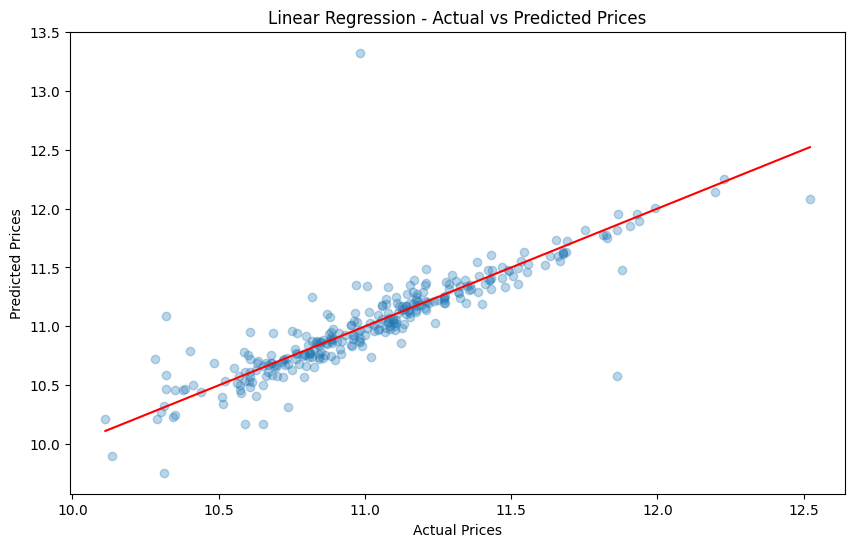

Random Forest: {'RMSE': 0.1400898954993157, 'R2': 0.870373649952737}


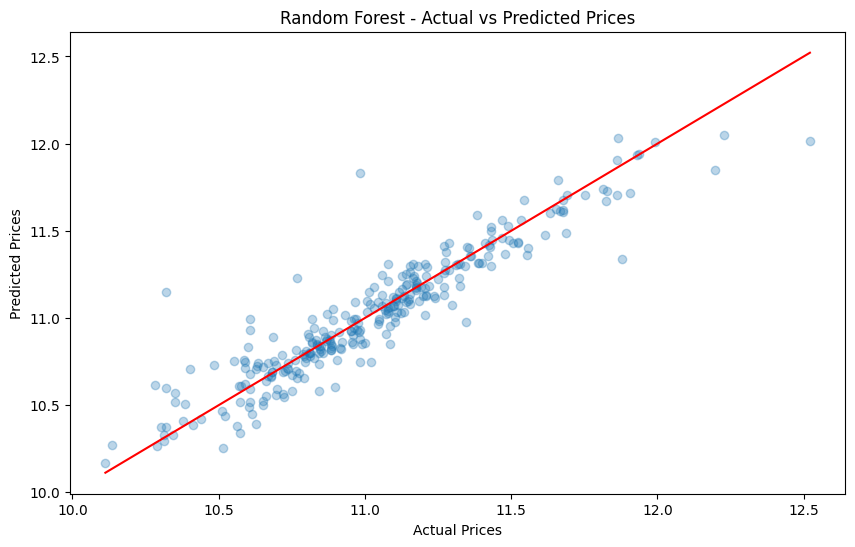

0:	learn: 0.0323898	total: 119ms	remaining: 1m 58s
200:	learn: 0.0048920	total: 5.74s	remaining: 22.8s
400:	learn: 0.0024155	total: 11s	remaining: 16.4s
600:	learn: 0.0011510	total: 16.1s	remaining: 10.7s
800:	learn: 0.0005894	total: 21.3s	remaining: 5.3s
999:	learn: 0.0003482	total: 26.2s	remaining: 0us
CatBoost: {'RMSE': 0.1264166921691161, 'R2': 0.8944426412932276}


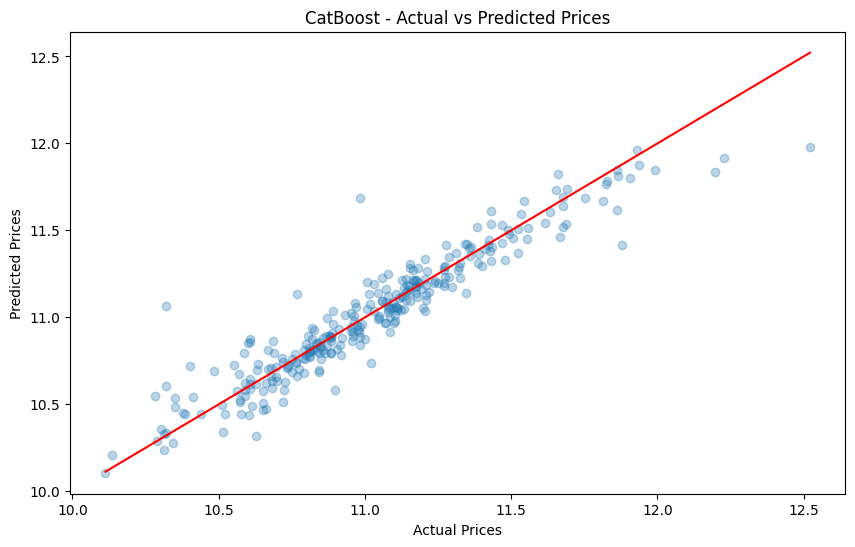

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4241
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 198
[LightGBM] [Info] Start training from score 2.486292
LightGBM: {'RMSE': 0.13490474116270665, 'R2': 0.8797917994819742}


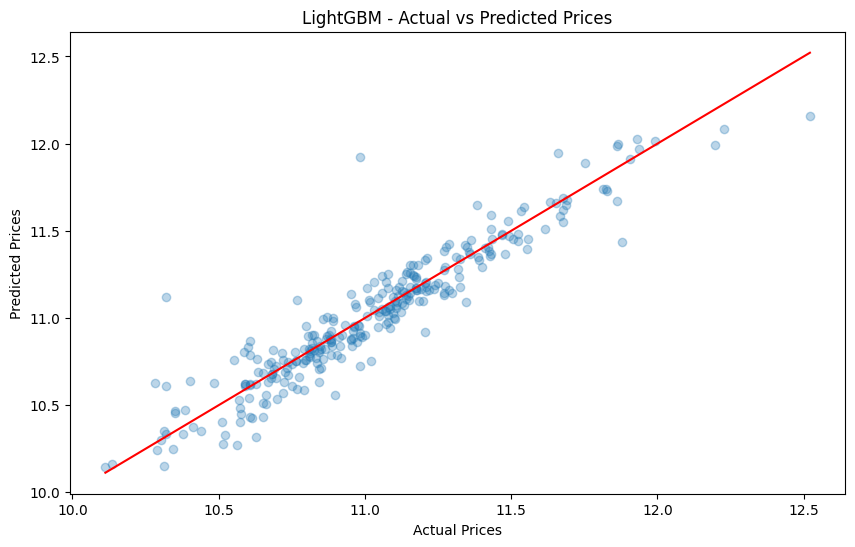

XGBoost: {'RMSE': 0.14836892342185598, 'R2': 0.8545996135684085}


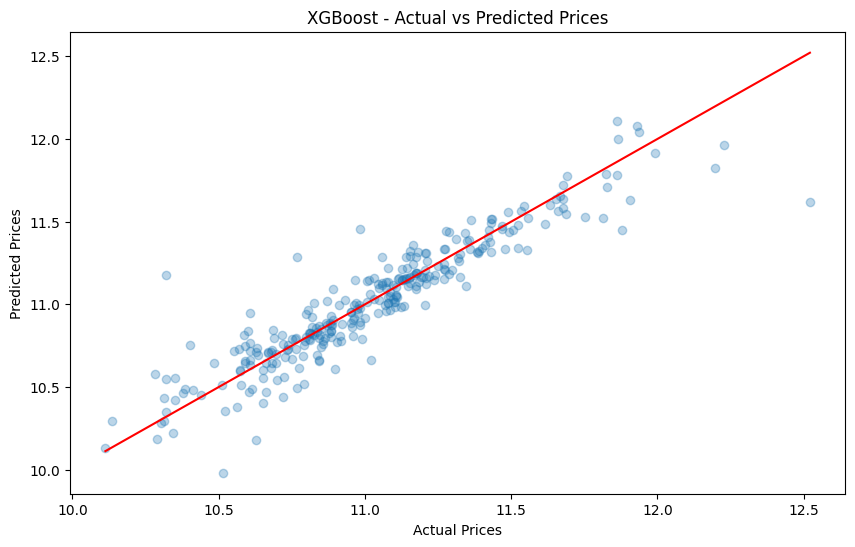

Reading training dataset...
Training dataset read in 0:00:08.819856. Found 1168 examples.
Training model...
Model trained in 0:00:07.470952
Compiling model...


[INFO 24-05-05 17:12:38.9526 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmphc58krhz/model/ with prefix 16911d49eec44df5
[INFO 24-05-05 17:12:38.9818 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:12:38.9834 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:12:38.9836 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 430ms/step
TFDF: {'RMSE': 0.13799658323574363, 'R2': 0.8742186253084605}


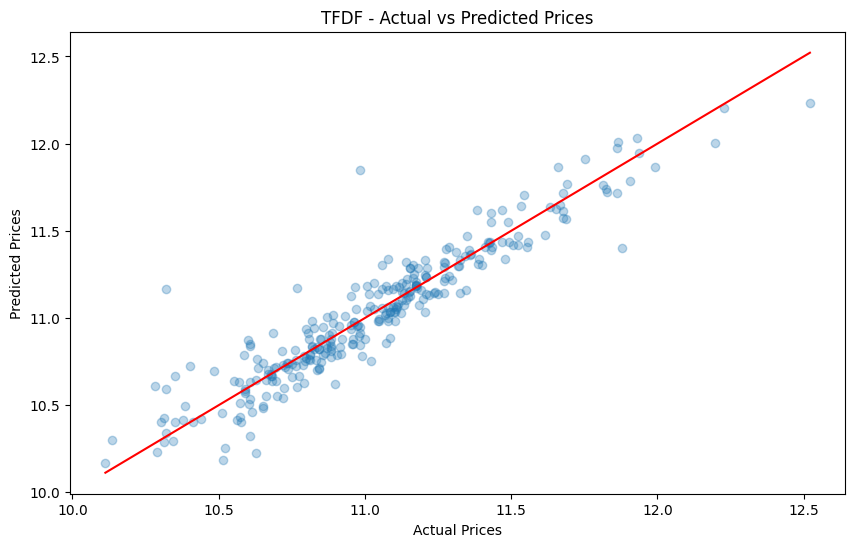

In [46]:
model_results = {}
for name, model in models.items():

    if name == 'TFDF':
        train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train.assign(SalePrice=y_train), label="SalePrice", task=tfdf.keras.Task.REGRESSION)
        val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test.assign(SalePrice=y_test), label="SalePrice", task=tfdf.keras.Task.REGRESSION)


        model.fit(train_ds)
        preds = model.predict(val_ds)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))
    r2 = r2_score(np.expm1(y_test), np.expm1(preds))
    model_results[name] = {'RMSE': rmse, 'R2': r2}

    print(f"{name}: {model_results[name]}")

    plot_actual_vs_predicted(np.expm1(y_test), np.expm1(preds), title=f'{name} - Actual vs Predicted Prices')

## Feature Selection

In [48]:
model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train.assign(SalePrice=y_train), label="SalePrice", task=tfdf.keras.Task.REGRESSION)
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test.assign(SalePrice=y_test), label="SalePrice", task=tfdf.keras.Task.REGRESSION)
model.fit(train_ds)
columns = []
scores = []
for i in model.make_inspector().variable_importances()['SUM_SCORE']:
    if i[0].name in df_dummy.columns:
        columns.append(i[0].name)
        scores.append(i[1])
importance_df = pd.DataFrame({'features': columns,'importance': scores})

Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjes0bau8 as temporary training directory


[WARNING 24-05-05 17:13:04.4726 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:04.4727 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:04.4727 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:04.461026. Found 1168 examples.
Training model...
Model trained in 0:00:07.323057
Compiling model...


[INFO 24-05-05 17:13:16.8713 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjes0bau8/model/ with prefix 06526091274b4ec3
[INFO 24-05-05 17:13:16.8825 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:13:16.8831 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:13:16.8832 EDT kernel.cc:1061] Use fast generic engine


Model compiled.


In [49]:
importance_df

features  importance
0                   OverallQual    2.283658
1                     TotalArea    1.954795
2                        Overal    0.334999
3    ProximityToSocialAmenities    0.220741
4                TotalBathrooms    0.205143
..                          ...         ...
144                SaleType_COD    0.000073
145                PavedDrive_P    0.000059
146          GarageType_CarPort    0.000053
147         Exterior1st_VinylSd    0.000046
148                HeatingQC_Gd    0.000009

[149 rows x 2 columns]

Text(0, 0.5, 'Feature')

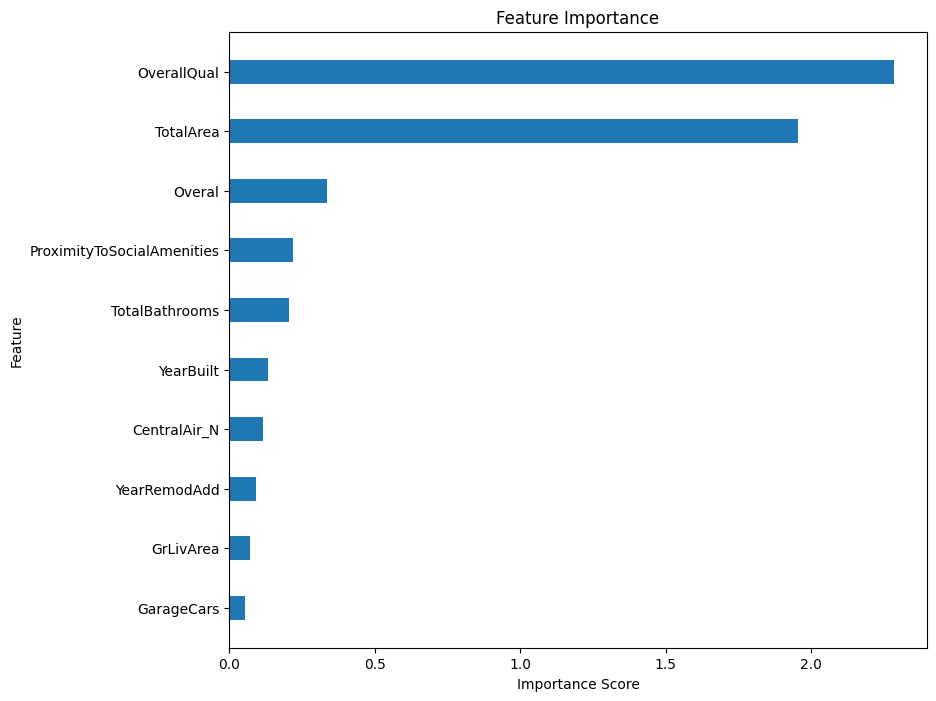

In [50]:
plt.figure(figsize=(9, 8))
plt.barh(list(reversed(importance_df['features'][:10])), list(reversed(importance_df['importance'][:10])), height=0.4)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

<Axes: >

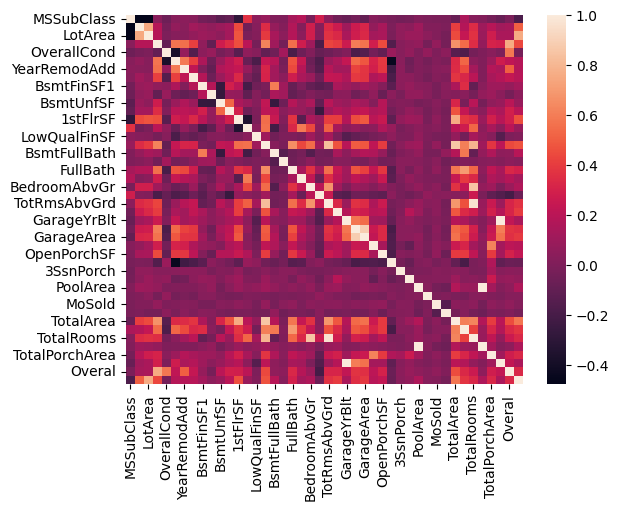

In [51]:
%matplotlib inline

corr = X[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalArea',
 'TotalBathrooms',
 'TotalRooms',
 'HasPool',
 'TotalPorchArea',
 'HasGarage',
 'Overal',
 'ProximityToSocialAmenities']].corr()

sns.heatmap(corr)

In [52]:
def get_mse(features_used):
    y = df_dummy['SalePrice']
    X = df_dummy[features_used]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train.assign(SalePrice=y_train), label="SalePrice", task=tfdf.keras.Task.REGRESSION)
    val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test.assign(SalePrice=y_test), label="SalePrice", task=tfdf.keras.Task.REGRESSION)
    model.fit(train_ds)

    preds = model.predict(val_ds)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))

    return rmse

In [53]:
features_num_ = []
mses_ = []
for i in range(1, len(importance_df)):
    features_used = list(importance_df['features'])[:i]
    mse = get_mse(features_used)
    features_num_.append(i)
    mses_.append(mse)

Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpifuflkka as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.165065. Found 1168 examples.
Training model...


[WARNING 24-05-05 17:13:32.4252 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:32.4252 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:32.4252 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Model trained in 0:00:00.130367
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:32.7464 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpifuflkka/model/ with prefix 273b19e938c54271
[INFO 24-05-05 17:13:32.7523 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:13:32.7524 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 52ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpn9mlc3vi as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.171171. Found 1168 examples.
Training model...


[WARNING 24-05-05 17:13:32.9584 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:32.9585 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:32.9585 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Model trained in 0:00:00.274467
Compiling model...


[INFO 24-05-05 17:13:33.4334 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpn9mlc3vi/model/ with prefix d8e0cdb03c964f8b
[INFO 24-05-05 17:13:33.4393 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 49ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpi7xtmthp as temporary training directory


[WARNING 24-05-05 17:13:33.6272 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:33.6273 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:33.6273 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...


Training dataset read in 0:00:00.200338. Found 1168 examples.
Training model...
Model trained in 0:00:00.105656
Compiling model...


[INFO 24-05-05 17:13:33.9622 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpi7xtmthp/model/ with prefix f027a9e8ef6c4e57
[INFO 24-05-05 17:13:33.9667 EDT kernel.cc:1061] Use fast generic engine


Model compiled.


1/1 [==============================] - 0s 61ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpn_eew20e as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:34.1948 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:34.1949 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:34.1950 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.211495. Found 1168 examples.
Training model...
Model trained in 0:00:00.120570
Compiling model...


[INFO 24-05-05 17:13:34.5512 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpn_eew20e/model/ with prefix e2cf67e309e64138
[INFO 24-05-05 17:13:34.5567 EDT kernel.cc:1061] Use fast generic engine


Model compiled.


1/1 [==============================] - 0s 54ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpd34nivuj as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:34.7733 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:34.7733 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:34.7733 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.227071. Found 1168 examples.
Training model...
Model trained in 0:00:00.139435
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:35.1680 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpd34nivuj/model/ with prefix bfd0277890564430
[INFO 24-05-05 17:13:35.1744 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 55ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpa08tdnh9 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:35.3960 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:35.3961 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:35.3961 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.225179. Found 1168 examples.
Training model...
Model trained in 0:00:00.161149
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:35.8126 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpa08tdnh9/model/ with prefix 9c2734ef8ffd410b
[INFO 24-05-05 17:13:35.8190 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 55ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp_vft1_pk as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:36.0440 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:36.0440 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:36.0440 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.248599. Found 1168 examples.
Training model...
Model trained in 0:00:00.191230
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:36.5117 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp_vft1_pk/model/ with prefix ad1f834f39204f26
[INFO 24-05-05 17:13:36.5198 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 66ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp_3uqqnde as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:36.7958 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:36.7959 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:36.7959 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.238592. Found 1168 examples.
Training model...
Model trained in 0:00:00.187823
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:37.2533 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp_3uqqnde/model/ with prefix 11fb2fa2a73d40d2
[INFO 24-05-05 17:13:37.2601 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 61ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmphyvy04ic as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:37.5204 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:37.5204 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:37.5205 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.242711. Found 1168 examples.
Training model...
Model trained in 0:00:00.204539
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:37.9990 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmphyvy04ic/model/ with prefix 7ec1a84d6b2d487f
[INFO 24-05-05 17:13:38.0066 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 61ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzi6mq8qq as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:38.2661 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:38.2661 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:38.2661 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.250446. Found 1168 examples.
Training model...
Model trained in 0:00:00.230161
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:38.7770 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzi6mq8qq/model/ with prefix 6bc004043a654136
[INFO 24-05-05 17:13:38.7847 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 63ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpsbg_hh7k as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:39.0506 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:39.0507 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:39.0507 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.260261. Found 1168 examples.
Training model...
Model trained in 0:00:00.243682
Compiling model...
Model compiled.


[INFO 24-05-05 17:13:39.5875 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpsbg_hh7k/model/ with prefix 8819770f624d4cc8
[INFO 24-05-05 17:13:39.5952 EDT kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 61ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmph6cbvd4f as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:39.8654 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:39.8655 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:39.8655 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.277279. Found 1168 examples.
Training model...
Model trained in 0:00:00.244992
Compiling model...


[INFO 24-05-05 17:13:40.4242 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmph6cbvd4f/model/ with prefix ca3ee7a161ea45d1
[INFO 24-05-05 17:13:40.4306 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 67ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpadiuz4np as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:40.7258 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:40.7259 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:40.7259 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.450684. Found 1168 examples.
Training model...
Model trained in 0:00:00.352423
Compiling model...


[INFO 24-05-05 17:13:41.5614 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpadiuz4np/model/ with prefix 9a326178375242c8
[INFO 24-05-05 17:13:41.5761 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 81ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp32su_aw6 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:41.9569 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:41.9570 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:41.9570 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.353711. Found 1168 examples.
Training model...
Model trained in 0:00:00.293901
Compiling model...


[INFO 24-05-05 17:13:42.6609 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp32su_aw6/model/ with prefix c266390f509b4645
[INFO 24-05-05 17:13:42.6684 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 78ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2ebs0vzm as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:43.0191 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:43.0191 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:43.0191 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.351053. Found 1168 examples.
Training model...
Model trained in 0:00:00.465763
Compiling model...


[INFO 24-05-05 17:13:43.8805 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2ebs0vzm/model/ with prefix eb614094fca34b86
[INFO 24-05-05 17:13:43.8921 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:13:43.8922 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 80ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5fr3tyra as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:44.2667 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:44.2668 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:44.2668 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.409670. Found 1168 examples.
Training model...
Model trained in 0:00:00.411613
Compiling model...


[INFO 24-05-05 17:13:45.1450 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5fr3tyra/model/ with prefix 003f46b716824f02
[INFO 24-05-05 17:13:45.1523 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 84ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpecfuvj12 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:45.5368 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:45.5369 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:45.5369 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.375435. Found 1168 examples.
Training model...
Model trained in 0:00:00.339776
Compiling model...


[INFO 24-05-05 17:13:46.3014 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpecfuvj12/model/ with prefix 2323a4b38ac648cf
[INFO 24-05-05 17:13:46.3086 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 88ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpeydr54xq as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:46.7287 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:46.7288 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:46.7288 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.397979. Found 1168 examples.
Training model...
Model trained in 0:00:00.377377
Compiling model...


[INFO 24-05-05 17:13:47.5855 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpeydr54xq/model/ with prefix 44a2467ce6e34813
[INFO 24-05-05 17:13:47.5934 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:13:47.5937 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 75ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2_cz376d as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:47.9975 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:47.9975 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:47.9975 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.419681. Found 1168 examples.
Training model...
Model trained in 0:00:00.365987
Compiling model...


[INFO 24-05-05 17:13:48.8341 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2_cz376d/model/ with prefix d2be11eae9b843be
[INFO 24-05-05 17:13:48.8412 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 88ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp4mxoo0u2 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:49.2541 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:49.2541 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:49.2542 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.439709. Found 1168 examples.
Training model...
Model trained in 0:00:00.415171
Compiling model...


[INFO 24-05-05 17:13:50.1638 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp4mxoo0u2/model/ with prefix 428b18c1179d4e33
[INFO 24-05-05 17:13:50.1718 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 83ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpfgxdiji7 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:50.6691 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:50.6692 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:50.6692 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.437356. Found 1168 examples.
Training model...
Model trained in 0:00:00.415361
Compiling model...


[INFO 24-05-05 17:13:51.5836 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpfgxdiji7/model/ with prefix a54e78f3bcbc4dca
[INFO 24-05-05 17:13:51.5916 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 174ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpoyo5mn_v as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:52.2770 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:52.2771 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:52.2771 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.471086. Found 1168 examples.
Training model...
Model trained in 0:00:00.468810
Compiling model...


[INFO 24-05-05 17:13:53.2889 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpoyo5mn_v/model/ with prefix 2607da3c7c6e4f6b
[INFO 24-05-05 17:13:53.2983 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 99ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp67kqyag6 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:53.7737 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:53.7738 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:53.7738 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.493353. Found 1168 examples.
Training model...
Model trained in 0:00:00.766537
Compiling model...


[INFO 24-05-05 17:13:55.1025 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp67kqyag6/model/ with prefix 8e180c9aa5a84c65
[INFO 24-05-05 17:13:55.1169 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:13:55.1170 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 86ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpstjv5hof as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:55.5628 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:55.5628 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:55.5629 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.473176. Found 1168 examples.
Training model...
Model trained in 0:00:00.530411
Compiling model...


[INFO 24-05-05 17:13:56.6272 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpstjv5hof/model/ with prefix 6a92e1329a9d429a
[INFO 24-05-05 17:13:56.6366 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 97ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpv3pvvw8a as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:57.1959 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:57.1960 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:57.1960 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.503392. Found 1168 examples.
Training model...
Model trained in 0:00:00.947817
Compiling model...


[INFO 24-05-05 17:13:58.7181 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpv3pvvw8a/model/ with prefix 1a0311e4f0084693
[INFO 24-05-05 17:13:58.7301 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 104ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpis6wrb4d as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:13:59.2506 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:59.2507 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:13:59.2508 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.511807. Found 1168 examples.
Training model...
Model trained in 0:00:00.684451
Compiling model...


[INFO 24-05-05 17:14:00.5235 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpis6wrb4d/model/ with prefix 0bd62720d2724e61
[INFO 24-05-05 17:14:00.5349 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 91ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpcaj8pf_u as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:01.0104 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:01.0105 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:01.0105 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.510501. Found 1168 examples.
Training model...
Model trained in 0:00:00.955612
Compiling model...


[INFO 24-05-05 17:14:02.5406 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpcaj8pf_u/model/ with prefix 488e8888235f4bca
[INFO 24-05-05 17:14:02.5560 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 90ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpgk3zksgz as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:03.1034 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:03.1035 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:03.1035 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.484204. Found 1168 examples.
Training model...
Model trained in 0:00:00.838678
Compiling model...


[INFO 24-05-05 17:14:04.4917 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpgk3zksgz/model/ with prefix 8982ba5b6bde4491
[INFO 24-05-05 17:14:04.5047 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 85ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9tc9zw_r as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:05.0216 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:05.0217 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:05.0217 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.281920. Found 1168 examples.
Training model...
Model trained in 0:00:00.734737
Compiling model...


[INFO 24-05-05 17:14:07.0964 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9tc9zw_r/model/ with prefix e80be68e34ba47cd
[INFO 24-05-05 17:14:07.1091 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:14:07.1091 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 93ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp58f5kd0y as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:07.6302 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:07.6302 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:07.6303 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.668126. Found 1168 examples.
Training model...
Model trained in 0:00:00.922020
Compiling model...


[INFO 24-05-05 17:14:09.2978 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp58f5kd0y/model/ with prefix a3ba2aa57d904f76
[INFO 24-05-05 17:14:09.3105 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 124ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpiu87u9_f as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:09.9133 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:09.9134 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:09.9134 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.548492. Found 1168 examples.
Training model...
Model trained in 0:00:01.210557
Compiling model...


[INFO 24-05-05 17:14:11.7339 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpiu87u9_f/model/ with prefix 7330d22912cf4df8
[INFO 24-05-05 17:14:11.7528 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 98ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpnvbxttld as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:12.2725 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:12.2726 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:12.2726 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.580101. Found 1168 examples.
Training model...
Model trained in 0:00:01.123837
Compiling model...


[INFO 24-05-05 17:14:14.0501 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpnvbxttld/model/ with prefix 19a6f2a90cca43d0
[INFO 24-05-05 17:14:14.0656 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 96ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjbd_1t_2 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:14.5938 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:14.5939 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:14.5940 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.628985. Found 1168 examples.
Training model...
Model trained in 0:00:00.809706
Compiling model...


[INFO 24-05-05 17:14:16.1144 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjbd_1t_2/model/ with prefix 4376b1986ce947bb
[INFO 24-05-05 17:14:16.1258 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 93ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpm0eso5n6 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:16.6610 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:16.6610 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:16.6610 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.551427. Found 1168 examples.
Training model...
Model trained in 0:00:01.267799
Compiling model...


[INFO 24-05-05 17:14:18.5423 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpm0eso5n6/model/ with prefix 487acc361cff4155
[INFO 24-05-05 17:14:18.5604 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:14:18.5610 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:14:18.5610 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 101ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp22iugwyr as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:19.1316 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:19.1317 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:19.1318 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.556926. Found 1168 examples.
Training model...
Model trained in 0:00:01.310553
Compiling model...


[INFO 24-05-05 17:14:21.0698 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp22iugwyr/model/ with prefix 9f180c25276f4bb9
[INFO 24-05-05 17:14:21.0884 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 100ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpe7nbdej0 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:21.6618 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:21.6619 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:21.6619 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.579368. Found 1168 examples.
Training model...
Model trained in 0:00:01.217517
Compiling model...


[INFO 24-05-05 17:14:23.5363 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpe7nbdej0/model/ with prefix 15f830670926448f
[INFO 24-05-05 17:14:23.5528 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 112ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9aeeks6p as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:24.1768 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:24.1769 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:24.1769 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.583528. Found 1168 examples.
Training model...
Model trained in 0:00:01.440677
Compiling model...


[INFO 24-05-05 17:14:26.2898 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9aeeks6p/model/ with prefix e495a1478ad848fa
[INFO 24-05-05 17:14:26.3099 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 103ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpmkqorcn3 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:26.9020 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:26.9021 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:26.9021 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.629181. Found 1168 examples.
Training model...
Model trained in 0:00:01.225900
Compiling model...


[INFO 24-05-05 17:14:28.8371 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpmkqorcn3/model/ with prefix 64338335e68945cc
[INFO 24-05-05 17:14:28.8530 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:14:28.8531 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 106ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpise1ysr_ as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:29.4618 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:29.4619 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:29.4620 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.602448. Found 1168 examples.
Training model...
Model trained in 0:00:01.372472
Compiling model...


[INFO 24-05-05 17:14:31.5155 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpise1ysr_/model/ with prefix a79789f3e5514322
[INFO 24-05-05 17:14:31.5385 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 112ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpkcx5kj49 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:32.2036 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:32.2037 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:32.2037 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.610984. Found 1168 examples.
Training model...
Model trained in 0:00:01.513893
Compiling model...


[INFO 24-05-05 17:14:34.4093 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpkcx5kj49/model/ with prefix 8ce18fbcbf6f4efd
[INFO 24-05-05 17:14:34.4290 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 109ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp95lyvaw9 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:35.0621 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:35.0622 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:35.0622 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.637051. Found 1168 examples.
Training model...
Model trained in 0:00:01.243412
Compiling model...


[INFO 24-05-05 17:14:37.0361 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp95lyvaw9/model/ with prefix 4a60ea74926a4978
[INFO 24-05-05 17:14:37.0500 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 123ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp3mf4eqq8 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:37.7623 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:37.7624 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:37.7625 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.694292. Found 1168 examples.
Training model...
Model trained in 0:00:01.270098
Compiling model...


[INFO 24-05-05 17:14:39.8221 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp3mf4eqq8/model/ with prefix 7a64bea892374057
[INFO 24-05-05 17:14:39.8357 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:14:39.8357 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 115ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpllw6zpyh as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:40.5019 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:40.5020 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:40.5020 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.680908. Found 1168 examples.
Training model...
Model trained in 0:00:01.329238
Compiling model...


[INFO 24-05-05 17:14:42.6163 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpllw6zpyh/model/ with prefix f9c528686c234ab1
[INFO 24-05-05 17:14:42.6320 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 112ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpvag6t1dm as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:43.3072 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:43.3074 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:43.3074 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.700619. Found 1168 examples.
Training model...
Model trained in 0:00:01.347501
Compiling model...


[INFO 24-05-05 17:14:45.4522 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpvag6t1dm/model/ with prefix e372df5ff7264e60
[INFO 24-05-05 17:14:45.4682 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 124ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpai320p3j as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:46.1740 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:46.1740 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:46.1740 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.689668. Found 1168 examples.
Training model...
Model trained in 0:00:01.930005
Compiling model...


[INFO 24-05-05 17:14:48.8955 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpai320p3j/model/ with prefix a08cd7a45ff74e1e
[INFO 24-05-05 17:14:48.9171 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:14:48.9179 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 130ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpm513pnzj as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:49.6579 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:49.6581 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:49.6581 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.736768. Found 1168 examples.
Training model...
Model trained in 0:00:01.086681
Compiling model...


[INFO 24-05-05 17:14:51.5974 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpm513pnzj/model/ with prefix 3dcf6236d2db42a5
[INFO 24-05-05 17:14:51.6092 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:14:51.6092 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 116ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyn0kr7d0 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:52.3179 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:52.3181 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:52.3181 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.789156. Found 1168 examples.
Training model...
Model trained in 0:00:01.254809
Compiling model...


[INFO 24-05-05 17:14:54.4633 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyn0kr7d0/model/ with prefix 2a5e22894c3b43ea
[INFO 24-05-05 17:14:54.4766 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 118ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpisdfs0f0 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:55.1959 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:55.1960 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:55.1961 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.822962. Found 1168 examples.
Training model...
Model trained in 0:00:01.044203
Compiling model...


[INFO 24-05-05 17:14:57.1685 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpisdfs0f0/model/ with prefix 7b7ee89f9cca4acd
[INFO 24-05-05 17:14:57.1788 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 123ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpgk20fzi1 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:14:57.9315 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:57.9316 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:14:57.9316 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.793357. Found 1168 examples.
Training model...
Model trained in 0:00:01.121025
Compiling model...


[INFO 24-05-05 17:14:59.9526 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpgk20fzi1/model/ with prefix 90ea69b198a24461
[INFO 24-05-05 17:14:59.9643 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 120ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpixttu7lt as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:00.7008 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:00.7009 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:00.7009 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.745991. Found 1168 examples.
Training model...
Model trained in 0:00:01.121341
Compiling model...


[INFO 24-05-05 17:15:02.6818 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpixttu7lt/model/ with prefix 95794b73562f43b7
[INFO 24-05-05 17:15:02.6934 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:15:02.6934 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 662ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpeugvqpyd as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:04.0201 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:04.0201 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:04.0202 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.910929. Found 1168 examples.
Training model...
Model trained in 0:00:01.146105
Compiling model...


[INFO 24-05-05 17:15:06.1826 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpeugvqpyd/model/ with prefix adba3817a94a4152
[INFO 24-05-05 17:15:06.1947 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 127ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpna75ts1q as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:07.0329 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:07.0330 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:07.0330 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.891375. Found 1168 examples.
Training model...
Model trained in 0:00:01.116359
Compiling model...


[INFO 24-05-05 17:15:09.1520 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpna75ts1q/model/ with prefix a0f460a03f634fc7
[INFO 24-05-05 17:15:09.1630 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 130ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdb91d5p1 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:10.0042 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:10.0043 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:10.0043 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.897666. Found 1168 examples.
Training model...
Model trained in 0:00:01.957468
Compiling model...


[INFO 24-05-05 17:15:12.9749 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdb91d5p1/model/ with prefix b935ffdf716944b3
[INFO 24-05-05 17:15:12.9942 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:15:12.9943 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 132ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdz4b020t as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:13.7722 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:13.7722 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:13.7722 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.845545. Found 1168 examples.
Training model...
Model trained in 0:00:01.469545
Compiling model...


[INFO 24-05-05 17:15:16.2027 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdz4b020t/model/ with prefix 2481eea0ea0e4583
[INFO 24-05-05 17:15:16.2157 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 131ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5i6x6wmq as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:17.0190 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:17.0191 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:17.0191 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.809383. Found 1168 examples.
Training model...
Model trained in 0:00:01.921518
Compiling model...


[INFO 24-05-05 17:15:19.8532 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5i6x6wmq/model/ with prefix 8b87aa075e554f73
[INFO 24-05-05 17:15:19.8703 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:15:19.8710 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 128ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpvd1vx303 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:20.6536 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:20.6538 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:20.6538 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.848253. Found 1168 examples.
Training model...
Model trained in 0:00:01.182155
Compiling model...


[INFO 24-05-05 17:15:22.7943 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpvd1vx303/model/ with prefix 28067f2fbb6d4c53
[INFO 24-05-05 17:15:22.8053 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 130ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpqvwgvctl as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:23.6092 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:23.6092 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:23.6093 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.828442. Found 1168 examples.
Training model...
Model trained in 0:00:01.076876
Compiling model...


[INFO 24-05-05 17:15:25.6315 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpqvwgvctl/model/ with prefix 0f58196672a742cc
[INFO 24-05-05 17:15:25.6411 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:15:25.6412 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 133ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplccbygh_ as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:26.4483 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:26.4484 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:26.4484 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.829794. Found 1168 examples.
Training model...
Model trained in 0:00:01.075403
Compiling model...


[INFO 24-05-05 17:15:28.4738 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplccbygh_/model/ with prefix af9ba709bf7749ef
[INFO 24-05-05 17:15:28.4833 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 134ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplavbfgar as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:29.3202 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:29.3202 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:29.3203 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.855109. Found 1168 examples.
Training model...
Model trained in 0:00:01.358343
Compiling model...


[INFO 24-05-05 17:15:31.6457 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplavbfgar/model/ with prefix e720ef7f8f9a4420
[INFO 24-05-05 17:15:31.6580 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 131ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmppi1p0sl8 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:32.4913 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:32.4914 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:32.4914 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.858923. Found 1168 examples.
Training model...
Model trained in 0:00:01.271211
Compiling model...


[INFO 24-05-05 17:15:34.7402 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmppi1p0sl8/model/ with prefix 96a650286fd349b8
[INFO 24-05-05 17:15:34.7506 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 153ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpe_tnctj3 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:35.6803 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:35.6804 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:35.6804 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.872256. Found 1168 examples.
Training model...
Model trained in 0:00:01.419321
Compiling model...


[INFO 24-05-05 17:15:38.0855 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpe_tnctj3/model/ with prefix 2e83f87bba514de0
[INFO 24-05-05 17:15:38.0984 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:15:38.0985 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 140ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp09oj9z2_ as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:39.0142 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:39.0143 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:39.0143 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.883710. Found 1168 examples.
Training model...
Model trained in 0:00:01.487165
Compiling model...


[INFO 24-05-05 17:15:41.5009 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp09oj9z2_/model/ with prefix ea803ef2fb8f485f
[INFO 24-05-05 17:15:41.5138 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 136ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpy_lofayc as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:42.3910 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:42.3911 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:42.3912 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.891983. Found 1168 examples.
Training model...
Model trained in 0:00:01.192924
Compiling model...


[INFO 24-05-05 17:15:44.6004 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpy_lofayc/model/ with prefix 9c1a0722396445d8
[INFO 24-05-05 17:15:44.6102 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 176ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmprdy6cc0r as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:45.6553 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:45.6554 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:45.6554 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.997287. Found 1168 examples.
Training model...
Model trained in 0:00:01.345534
Compiling model...


[INFO 24-05-05 17:15:48.1320 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmprdy6cc0r/model/ with prefix 841576445646488f
[INFO 24-05-05 17:15:48.1429 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:15:48.1429 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 157ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdxuhdojo as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:49.1680 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:49.1680 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:49.1680 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.989196. Found 1168 examples.
Training model...
Model trained in 0:00:01.988553
Compiling model...


[INFO 24-05-05 17:15:52.2784 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdxuhdojo/model/ with prefix 45eaa165d249498b
[INFO 24-05-05 17:15:52.2940 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:15:52.2946 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 150ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyyehs1nz as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:53.4170 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:53.4171 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:53.4171 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.015054. Found 1168 examples.
Training model...
Model trained in 0:00:02.335214
Compiling model...


[INFO 24-05-05 17:15:56.9311 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyyehs1nz/model/ with prefix be8ac6b768894875
[INFO 24-05-05 17:15:56.9502 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 141ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2r0odilg as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:15:57.9047 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:57.9047 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:15:57.9048 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.134824. Found 1168 examples.
Training model...
Model trained in 0:00:02.036099
Compiling model...


[INFO 24-05-05 17:16:01.2134 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2r0odilg/model/ with prefix 105ee454f005488e
[INFO 24-05-05 17:16:01.2285 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:16:01.2285 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 147ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpomybkdjr as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:02.2888 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:02.2890 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:02.2890 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.937804. Found 1168 examples.
Training model...
Model trained in 0:00:02.068364
Compiling model...


[INFO 24-05-05 17:16:05.4095 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpomybkdjr/model/ with prefix 9c796cf205bb49b3
[INFO 24-05-05 17:16:05.4268 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 148ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpds1ds6i2 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:06.3575 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:06.3576 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:06.3577 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.612779. Found 1168 examples.
Training model...
Model trained in 0:00:01.377413
Compiling model...


[INFO 24-05-05 17:16:09.4769 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpds1ds6i2/model/ with prefix 5d17b0feafd64145
[INFO 24-05-05 17:16:09.4878 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 145ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp42402srh as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:10.4276 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:10.4277 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:10.4278 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.977070. Found 1168 examples.
Training model...
Model trained in 0:00:02.112960
Compiling model...


[INFO 24-05-05 17:16:13.6442 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp42402srh/model/ with prefix fee6f2f3d1184c7e
[INFO 24-05-05 17:16:13.6619 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:16:13.6620 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 147ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpq7_leovl as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:14.5949 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:14.5949 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:14.5950 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.959770. Found 1168 examples.
Training model...
Model trained in 0:00:02.323313
Compiling model...


[INFO 24-05-05 17:16:17.9995 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpq7_leovl/model/ with prefix d5c6b41710b54921
[INFO 24-05-05 17:16:18.0170 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 173ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplal_dxx9 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:18.9851 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:18.9852 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:18.9853 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.993149. Found 1168 examples.
Training model...
Model trained in 0:00:03.004335
Compiling model...


[INFO 24-05-05 17:16:23.1044 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplal_dxx9/model/ with prefix d778a36d34d242ad
[INFO 24-05-05 17:16:23.1247 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:16:23.1255 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 145ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjrnrav6x as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:24.0771 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:24.0771 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:24.0772 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.982390. Found 1168 examples.
Training model...
Model trained in 0:00:02.434138
Compiling model...


[INFO 24-05-05 17:16:27.6159 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjrnrav6x/model/ with prefix 83400dc242e74491
[INFO 24-05-05 17:16:27.6350 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:16:27.6351 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 147ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpl6cztnnt as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:28.5949 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:28.5950 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:28.5950 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.033013. Found 1168 examples.
Training model...
Model trained in 0:00:02.422158
Compiling model...


[INFO 24-05-05 17:16:32.1787 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpl6cztnnt/model/ with prefix 4f91c57255a94953
[INFO 24-05-05 17:16:32.1969 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 148ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpsz5m843_ as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:33.1749 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:33.1750 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:33.1750 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.001539. Found 1168 examples.
Training model...
Model trained in 0:00:02.337783
Compiling model...


[INFO 24-05-05 17:16:36.6436 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpsz5m843_/model/ with prefix 0f3752e8a7f14a9b
[INFO 24-05-05 17:16:36.6618 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 148ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp698fp2ue as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:37.6463 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:37.6464 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:37.6464 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.070568. Found 1168 examples.
Training model...
Model trained in 0:00:02.527503
Compiling model...


[INFO 24-05-05 17:16:41.3745 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp698fp2ue/model/ with prefix d25082dda16c454c
[INFO 24-05-05 17:16:41.3922 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:16:41.3923 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 155ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpf8vo76n8 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:42.4265 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:42.4266 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:42.4266 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.056818. Found 1168 examples.
Training model...
Model trained in 0:00:01.762290
Compiling model...


[INFO 24-05-05 17:16:45.3916 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpf8vo76n8/model/ with prefix 3ce9f171dca540c0
[INFO 24-05-05 17:16:45.4048 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 150ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpr0tcznhs as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:46.4148 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:46.4149 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:46.4149 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.040807. Found 1168 examples.
Training model...
Model trained in 0:00:02.367764
Compiling model...


[INFO 24-05-05 17:16:49.9543 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpr0tcznhs/model/ with prefix d6a1a37957174c54
[INFO 24-05-05 17:16:49.9714 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 154ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp7eqiltxe as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:50.9823 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:50.9824 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:50.9824 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.095564. Found 1168 examples.
Training model...
Model trained in 0:00:01.754577
Compiling model...


[INFO 24-05-05 17:16:53.9726 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp7eqiltxe/model/ with prefix bdaafabc4e6f4d24
[INFO 24-05-05 17:16:53.9845 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:16:53.9850 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:16:53.9850 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 155ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpp6o7ktxv as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:54.9980 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:54.9981 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:54.9981 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.069977. Found 1168 examples.
Training model...
Model trained in 0:00:02.000876
Compiling model...


[INFO 24-05-05 17:16:58.2089 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpp6o7ktxv/model/ with prefix e908bae162db45a4
[INFO 24-05-05 17:16:58.2210 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 167ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9ieeubrm as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:16:59.2710 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:59.2710 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:16:59.2710 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.107866. Found 1168 examples.
Training model...
Model trained in 0:00:02.631038
Compiling model...


[INFO 24-05-05 17:17:03.1506 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9ieeubrm/model/ with prefix 21accd3f9ad344ad
[INFO 24-05-05 17:17:03.1695 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 157ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpprb3dlp5 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:04.2208 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:04.2209 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:04.2209 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.120717. Found 1168 examples.
Training model...
Model trained in 0:00:03.736653
Compiling model...


[INFO 24-05-05 17:17:09.2128 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpprb3dlp5/model/ with prefix 21960da68734478a
[INFO 24-05-05 17:17:09.2339 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:17:09.2340 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 171ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpy3i114vd as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:10.4670 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:10.4671 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:10.4671 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.186895. Found 1168 examples.
Training model...
Model trained in 0:00:01.962402
Compiling model...


[INFO 24-05-05 17:17:13.7579 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpy3i114vd/model/ with prefix a9a738e3c3fc4421
[INFO 24-05-05 17:17:13.7706 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 160ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdacw252a as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:14.8584 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:14.8584 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:14.8585 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.106290. Found 1168 examples.
Training model...
Model trained in 0:00:03.230051
Compiling model...


[INFO 24-05-05 17:17:19.3326 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdacw252a/model/ with prefix de0f5e2ec34f4d4a
[INFO 24-05-05 17:17:19.3524 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:17:19.3525 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 159ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpi1vyu3_s as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:20.4676 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:20.4677 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:20.4677 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.123959. Found 1168 examples.
Training model...
Model trained in 0:00:02.500692
Compiling model...


[INFO 24-05-05 17:17:24.2365 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpi1vyu3_s/model/ with prefix 6f7aeb4e0b674edd
[INFO 24-05-05 17:17:24.2520 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:17:24.2526 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 167ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpn15qj_ak as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:26.6620 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:26.6621 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:26.6621 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.250577. Found 1168 examples.
Training model...
Model trained in 0:00:02.049940
Compiling model...


[INFO 24-05-05 17:17:30.1137 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpn15qj_ak/model/ with prefix ac7b57cf92554cd6
[INFO 24-05-05 17:17:30.1272 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:17:30.1272 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 164ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzxxsejff as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:31.2640 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:31.2641 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:31.2641 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.148985. Found 1168 examples.
Training model...
Model trained in 0:00:02.003031
Compiling model...


[INFO 24-05-05 17:17:34.5676 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzxxsejff/model/ with prefix ca31a9fe8c10466c
[INFO 24-05-05 17:17:34.5808 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 164ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpq77ek1z5 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:35.6814 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:35.6814 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:35.6814 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.167796. Found 1168 examples.
Training model...
Model trained in 0:00:02.481571
Compiling model...


[INFO 24-05-05 17:17:39.4851 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpq77ek1z5/model/ with prefix 0a50d0811bc046f2
[INFO 24-05-05 17:17:39.5004 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 169ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpa1191pe_ as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:40.7050 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:40.7050 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:40.7050 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.175990. Found 1168 examples.
Training model...
Model trained in 0:00:02.153751
Compiling model...


[INFO 24-05-05 17:17:44.1901 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpa1191pe_/model/ with prefix e4cdd800e8ba4e36
[INFO 24-05-05 17:17:44.2033 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:17:44.2033 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 168ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjkd_140h as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:45.3984 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:45.3985 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:45.3985 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.209567. Found 1168 examples.
Training model...
Model trained in 0:00:02.403491
Compiling model...


[INFO 24-05-05 17:17:49.1649 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjkd_140h/model/ with prefix 2186df7206684b88
[INFO 24-05-05 17:17:49.1800 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 185ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp42w7snkj as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:50.3436 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:50.3437 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:50.3437 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.205200. Found 1168 examples.
Training model...
Model trained in 0:00:01.605880
Compiling model...


[INFO 24-05-05 17:17:53.3170 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp42w7snkj/model/ with prefix d6549b2510a1400a
[INFO 24-05-05 17:17:53.3268 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 167ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp821nnyi4 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:54.4786 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:54.4786 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:54.4787 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.458857. Found 1168 examples.
Training model...
Model trained in 0:00:02.219047
Compiling model...


[INFO 24-05-05 17:17:58.3144 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp821nnyi4/model/ with prefix 2a399af11d2f4791
[INFO 24-05-05 17:17:58.3275 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:17:58.3280 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:17:58.3280 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 175ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpht6lnj7s as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:17:59.4965 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:59.4965 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:17:59.4965 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.336081. Found 1168 examples.
Training model...
Model trained in 0:00:02.317236
Compiling model...


[INFO 24-05-05 17:18:03.3304 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpht6lnj7s/model/ with prefix 56830baf4f014f1f
[INFO 24-05-05 17:18:03.3459 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 176ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpfdqdmovc as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:04.5263 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:04.5264 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:04.5264 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.238159. Found 1168 examples.
Training model...
Model trained in 0:00:03.030808
Compiling model...


[INFO 24-05-05 17:18:08.9568 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpfdqdmovc/model/ with prefix e037a51aa71f4308
[INFO 24-05-05 17:18:08.9751 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:18:08.9752 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 191ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp4uryn386 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:10.5535 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:10.5535 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:10.5535 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.246429. Found 1168 examples.
Training model...
Model trained in 0:00:02.389560
Compiling model...


[INFO 24-05-05 17:18:14.3480 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp4uryn386/model/ with prefix 0af315dfff754932
[INFO 24-05-05 17:18:14.3633 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 175ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5m_mslon as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:15.5875 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:15.5876 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:15.5876 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.266238. Found 1168 examples.
Training model...
Model trained in 0:00:02.378280
Compiling model...


[INFO 24-05-05 17:18:19.4159 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5m_mslon/model/ with prefix 511ca4c7816642f3
[INFO 24-05-05 17:18:19.4309 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:18:19.4310 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 201ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpj206hq0e as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:20.6702 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:20.6702 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:20.6702 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.276161. Found 1168 examples.
Training model...
Model trained in 0:00:03.017847
Compiling model...


[INFO 24-05-05 17:18:25.1246 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpj206hq0e/model/ with prefix 5eb6212a06234fd1
[INFO 24-05-05 17:18:25.1433 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 179ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpsgqqlnlu as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:26.3659 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:26.3660 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:26.3660 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.292959. Found 1168 examples.
Training model...
Model trained in 0:00:03.386249
Compiling model...


[INFO 24-05-05 17:18:31.2082 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpsgqqlnlu/model/ with prefix 96e459b80bc04b9b
[INFO 24-05-05 17:18:31.2262 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:18:31.2269 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:18:31.2270 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 183ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmps21p5ufp as temporary training directory


[WARNING 24-05-05 17:18:32.4636 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:32.4636 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:32.4636 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.314053. Found 1168 examples.
Training model...
Model trained in 0:00:02.385139
Compiling model...


[INFO 24-05-05 17:18:36.3711 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmps21p5ufp/model/ with prefix 68874c8923db4263
[INFO 24-05-05 17:18:36.3839 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 192ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp720j7gsi as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:37.6568 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:37.6568 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:37.6569 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.466093. Found 1168 examples.
Training model...
Model trained in 0:00:03.354114
Compiling model...


[INFO 24-05-05 17:18:42.6402 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp720j7gsi/model/ with prefix d97997c76d794c39
[INFO 24-05-05 17:18:42.6598 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:18:42.6598 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 193ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzs3ytlrl as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:44.9488 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:44.9488 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:44.9489 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.330973. Found 1168 examples.
Training model...
Model trained in 0:00:02.522776
Compiling model...


[INFO 24-05-05 17:18:48.9821 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzs3ytlrl/model/ with prefix 27e0397665ff4fcf
[INFO 24-05-05 17:18:48.9957 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 184ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpqp9zdjli as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:50.3076 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:50.3077 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:50.3077 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.349554. Found 1168 examples.
Training model...
Model trained in 0:00:02.555529
Compiling model...


[INFO 24-05-05 17:18:54.3888 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpqp9zdjli/model/ with prefix 1b1370d2b98d4550
[INFO 24-05-05 17:18:54.4024 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:18:54.4024 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 180ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpvad2nl4y as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:18:55.6604 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:55.6605 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:18:55.6605 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.339185. Found 1168 examples.
Training model...
Model trained in 0:00:02.847860
Compiling model...


[INFO 24-05-05 17:19:00.0183 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpvad2nl4y/model/ with prefix 35cac7a7b44647f4
[INFO 24-05-05 17:19:00.0340 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 202ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpeen6oe41 as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:19:01.3179 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:01.3180 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:01.3181 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.344210. Found 1168 examples.
Training model...
Model trained in 0:00:03.138442
Compiling model...


[INFO 24-05-05 17:19:05.9726 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpeen6oe41/model/ with prefix 4d829ae67d30451d
[INFO 24-05-05 17:19:05.9901 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:19:05.9908 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:19:05.9909 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 193ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpald5n1dm as temporary training directory


[WARNING 24-05-05 17:19:07.3083 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:07.3084 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:07.3084 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.770234. Found 1168 examples.
Training model...
Model trained in 0:00:03.004640
Compiling model...


[INFO 24-05-05 17:19:12.2846 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpald5n1dm/model/ with prefix a1823893abc641e7
[INFO 24-05-05 17:19:12.2982 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 184ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjxydomjy as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:19:13.6517 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:13.6517 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:13.6518 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.394598. Found 1168 examples.
Training model...
Model trained in 0:00:01.931237
Compiling model...


[INFO 24-05-05 17:19:17.1621 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpjxydomjy/model/ with prefix b27ed5e67d064bb3
[INFO 24-05-05 17:19:17.1722 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:19:17.1722 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 187ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpl3mnnohf as temporary training directory


[WARNING 24-05-05 17:19:18.4776 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:18.4777 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:18.4777 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.382919. Found 1168 examples.
Training model...
Model trained in 0:00:02.024995
Compiling model...


[INFO 24-05-05 17:19:22.1032 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpl3mnnohf/model/ with prefix c7babb3fcdc8449c
[INFO 24-05-05 17:19:22.1134 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 190ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9qidv0go as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:19:23.4342 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:23.4343 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:23.4344 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.386848. Found 1168 examples.
Training model...
Model trained in 0:00:01.883476
Compiling model...


[INFO 24-05-05 17:19:26.8923 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9qidv0go/model/ with prefix 3fe9edd658e94bea
[INFO 24-05-05 17:19:26.9023 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 190ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmptpoo9fjt as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:19:28.2274 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:28.2275 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:28.2276 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.409166. Found 1168 examples.
Training model...
Model trained in 0:00:02.098939
Compiling model...


[INFO 24-05-05 17:19:31.9245 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmptpoo9fjt/model/ with prefix 8cb4d779bb334da2
[INFO 24-05-05 17:19:31.9344 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:19:31.9344 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 191ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpalo5__lh as temporary training directory


[WARNING 24-05-05 17:19:33.3113 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:33.3114 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:33.3114 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.418256. Found 1168 examples.
Training model...
Model trained in 0:00:01.915081
Compiling model...


[INFO 24-05-05 17:19:36.8358 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpalo5__lh/model/ with prefix 56d36b7784d04e81
[INFO 24-05-05 17:19:36.8458 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:19:36.8464 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 190ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp235inqhs as temporary training directory
Reading training dataset...


[WARNING 24-05-05 17:19:38.1786 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:38.1787 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:38.1788 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.430798. Found 1168 examples.
Training model...
Model trained in 0:00:02.273714
Compiling model...


[INFO 24-05-05 17:19:42.0700 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp235inqhs/model/ with prefix b7b763a2e0dc4ebd
[INFO 24-05-05 17:19:42.0820 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:19:42.0821 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 192ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpmwoadewk as temporary training directory


[WARNING 24-05-05 17:19:43.4457 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:43.4458 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:43.4458 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.487766. Found 1168 examples.
Training model...
Model trained in 0:00:02.410949
Compiling model...


[INFO 24-05-05 17:19:47.5364 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpmwoadewk/model/ with prefix 2eb1c56510134622
[INFO 24-05-05 17:19:47.5484 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 195ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdqbduup_ as temporary training directory


[WARNING 24-05-05 17:19:48.9211 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:48.9212 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:48.9212 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.462158. Found 1168 examples.
Training model...
Model trained in 0:00:02.232558
Compiling model...


[INFO 24-05-05 17:19:52.8078 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdqbduup_/model/ with prefix 190be0ea195a4712
[INFO 24-05-05 17:19:52.8191 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:19:52.8191 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 195ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpoo5w5osx as temporary training directory


[WARNING 24-05-05 17:19:54.2025 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:54.2026 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:54.2026 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.462882. Found 1168 examples.
Training model...
Model trained in 0:00:02.174971
Compiling model...


[INFO 24-05-05 17:19:58.0375 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpoo5w5osx/model/ with prefix 73c0ba2e80684794
[INFO 24-05-05 17:19:58.0490 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 198ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpbcyhj6ru as temporary training directory


[WARNING 24-05-05 17:19:59.4384 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:59.4385 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:19:59.4385 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:02.591399. Found 1168 examples.
Training model...
Model trained in 0:00:02.612666
Compiling model...


[INFO 24-05-05 17:20:04.8386 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpbcyhj6ru/model/ with prefix 61f3bc01d8da49d2
[INFO 24-05-05 17:20:04.8514 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:20:04.8515 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 210ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9bghmf3n as temporary training directory


[WARNING 24-05-05 17:20:06.2581 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:06.2582 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:06.2582 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.474958. Found 1168 examples.
Training model...
Model trained in 0:00:01.971290
Compiling model...


[INFO 24-05-05 17:20:09.9073 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9bghmf3n/model/ with prefix 57c269b8e2964889
[INFO 24-05-05 17:20:09.9166 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:20:09.9171 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 201ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp838rv6aq as temporary training directory


[WARNING 24-05-05 17:20:11.3296 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:11.3296 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:11.3297 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.537057. Found 1168 examples.
Training model...
Model trained in 0:00:02.373667
Compiling model...


[INFO 24-05-05 17:20:15.4429 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp838rv6aq/model/ with prefix 8b331f0253fc4dd7
[INFO 24-05-05 17:20:15.4549 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:20:15.4549 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 201ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp7f822616 as temporary training directory


[WARNING 24-05-05 17:20:16.8738 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:16.8739 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:16.8739 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.519845. Found 1168 examples.
Training model...
Model trained in 0:00:02.721625
Compiling model...


[INFO 24-05-05 17:20:21.3148 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp7f822616/model/ with prefix 3f86bc3d009141cd
[INFO 24-05-05 17:20:21.3274 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 210ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpg8wg4r7c as temporary training directory


[WARNING 24-05-05 17:20:22.8060 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:22.8062 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:22.8062 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.521850. Found 1168 examples.
Training model...
Model trained in 0:00:02.500570
Compiling model...


[INFO 24-05-05 17:20:27.0365 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpg8wg4r7c/model/ with prefix aea5b3b59bde4bde
[INFO 24-05-05 17:20:27.0479 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:20:27.0480 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 202ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2pn2lt10 as temporary training directory


[WARNING 24-05-05 17:20:28.4952 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:28.4952 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:28.4952 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.552747. Found 1168 examples.
Training model...
Model trained in 0:00:02.163137
Compiling model...


[INFO 24-05-05 17:20:32.4259 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp2pn2lt10/model/ with prefix 1e477fc518f44403
[INFO 24-05-05 17:20:32.4360 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 210ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpt6bx4sa2 as temporary training directory


[WARNING 24-05-05 17:20:33.9108 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:33.9109 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:33.9109 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.544896. Found 1168 examples.
Training model...
Model trained in 0:00:02.236928
Compiling model...


[INFO 24-05-05 17:20:37.9083 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpt6bx4sa2/model/ with prefix 13ef4a2ee0674b3e
[INFO 24-05-05 17:20:37.9191 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:20:37.9192 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 211ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplbuj1qu5 as temporary training directory


[WARNING 24-05-05 17:20:39.3835 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:39.3836 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:39.3836 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.582801. Found 1168 examples.
Training model...
Model trained in 0:00:02.568100
Compiling model...


[INFO 24-05-05 17:20:43.7529 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmplbuj1qu5/model/ with prefix c77db44d6d614bf3
[INFO 24-05-05 17:20:43.7638 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:20:43.7644 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 215ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpp6l884dq as temporary training directory


[WARNING 24-05-05 17:20:45.2344 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:45.2345 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:45.2345 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.585558. Found 1168 examples.
Training model...
Model trained in 0:00:02.536216
Compiling model...


[INFO 24-05-05 17:20:49.5754 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpp6l884dq/model/ with prefix 1ec98e3148e74ad8
[INFO 24-05-05 17:20:49.5882 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:20:49.5883 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 214ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpuw8rom7e as temporary training directory


[WARNING 24-05-05 17:20:51.0673 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:51.0673 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:51.0674 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.738354. Found 1168 examples.
Training model...
Model trained in 0:00:02.651485
Compiling model...


[INFO 24-05-05 17:20:55.6731 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpuw8rom7e/model/ with prefix e224339c7ce246ed
[INFO 24-05-05 17:20:55.6855 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 216ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9uf300mt as temporary training directory


[WARNING 24-05-05 17:20:57.1728 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:57.1729 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:20:57.1730 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.594030. Found 1168 examples.
Training model...
Model trained in 0:00:02.860143
Compiling model...


[INFO 24-05-05 17:21:01.8433 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9uf300mt/model/ with prefix 4c6ac2a73af947fd
[INFO 24-05-05 17:21:01.8561 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:21:01.8561 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 213ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdwlsz1ik as temporary training directory


[WARNING 24-05-05 17:21:03.4680 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:03.4681 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:03.4681 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.986382. Found 1168 examples.
Training model...
Model trained in 0:00:03.889412
Compiling model...


[INFO 24-05-05 17:21:09.5592 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpdwlsz1ik/model/ with prefix c32710b75e0643e3
[INFO 24-05-05 17:21:09.5724 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 232ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpi5v3kg6y as temporary training directory


[WARNING 24-05-05 17:21:11.1592 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:11.1593 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:11.1593 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.658956. Found 1168 examples.
Training model...
Model trained in 0:00:04.576621
Compiling model...


[INFO 24-05-05 17:21:17.6034 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpi5v3kg6y/model/ with prefix c3b70c5420ed4da6
[INFO 24-05-05 17:21:17.6257 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:21:17.6265 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:21:17.6266 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 224ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpnrrn0kkn as temporary training directory


[WARNING 24-05-05 17:21:19.2356 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:19.2357 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:19.2358 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.636783. Found 1168 examples.
Training model...
Model trained in 0:00:03.311848
Compiling model...


[INFO 24-05-05 17:21:24.4184 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpnrrn0kkn/model/ with prefix c5067eb492ef42ef
[INFO 24-05-05 17:21:24.4324 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 221ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5ofy_f6f as temporary training directory


[WARNING 24-05-05 17:21:26.0330 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:26.0331 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:26.0331 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.652247. Found 1168 examples.
Training model...
Model trained in 0:00:02.298635
Compiling model...


[INFO 24-05-05 17:21:30.2097 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp5ofy_f6f/model/ with prefix 3a9e68b0376546af
[INFO 24-05-05 17:21:30.2199 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:21:30.2200 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 218ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpf2f7gtaz as temporary training directory


[WARNING 24-05-05 17:21:31.7796 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:31.7796 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:31.7797 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.678105. Found 1168 examples.
Training model...
Model trained in 0:00:02.733797
Compiling model...


[INFO 24-05-05 17:21:37.3906 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpf2f7gtaz/model/ with prefix ed0f835fe3224c2b
[INFO 24-05-05 17:21:37.4032 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 246ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpc8fcn217 as temporary training directory


[WARNING 24-05-05 17:21:39.0621 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:39.0622 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:39.0622 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.696470. Found 1168 examples.
Training model...
Model trained in 0:00:04.229256
Compiling model...


[INFO 24-05-05 17:21:45.2149 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpc8fcn217/model/ with prefix b27f72e4302c41ca
[INFO 24-05-05 17:21:45.2338 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:21:45.2339 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 248ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpwt969nf1 as temporary training directory


[WARNING 24-05-05 17:21:47.0768 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:47.0769 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:47.0769 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.996941. Found 1168 examples.
Training model...
Model trained in 0:00:02.842158
Compiling model...


[INFO 24-05-05 17:21:52.2023 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpwt969nf1/model/ with prefix 4f7796cd0fd0497e
[INFO 24-05-05 17:21:52.2152 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:21:52.2158 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 257ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp780snmwb as temporary training directory


[WARNING 24-05-05 17:21:53.8911 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:53.8912 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:21:53.8912 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.713501. Found 1168 examples.
Training model...
Model trained in 0:00:03.028585
Compiling model...


[INFO 24-05-05 17:21:58.8665 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp780snmwb/model/ with prefix 23ffe9c9b54b43d7
[INFO 24-05-05 17:21:58.8795 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:21:58.8796 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 236ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyqapvam3 as temporary training directory


[WARNING 24-05-05 17:22:00.4966 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:00.4966 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:00.4967 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.739538. Found 1168 examples.
Training model...
Model trained in 0:00:03.098546
Compiling model...


[INFO 24-05-05 17:22:05.5715 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyqapvam3/model/ with prefix a460ea84f4e44be4
[INFO 24-05-05 17:22:05.5858 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 228ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmprvh1x5aj as temporary training directory


[WARNING 24-05-05 17:22:07.2011 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:07.2013 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:07.2013 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.742793. Found 1168 examples.
Training model...
Model trained in 0:00:03.549928
Compiling model...


[INFO 24-05-05 17:22:12.7258 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmprvh1x5aj/model/ with prefix fb58c246f84b40b2
[INFO 24-05-05 17:22:12.7401 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:22:12.7402 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 226ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpp71wj_q2 as temporary training directory


[WARNING 24-05-05 17:22:14.4047 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:14.4047 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:14.4048 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.743955. Found 1168 examples.
Training model...
Model trained in 0:00:02.312553
Compiling model...


[INFO 24-05-05 17:22:18.7052 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpp71wj_q2/model/ with prefix 05214a6dbee0432f
[INFO 24-05-05 17:22:18.7153 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 235ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp7ye88eqq as temporary training directory


[WARNING 24-05-05 17:22:20.3769 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:20.3770 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:20.3770 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.781219. Found 1168 examples.
Training model...
Model trained in 0:00:02.347318
Compiling model...


[INFO 24-05-05 17:22:24.7515 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp7ye88eqq/model/ with prefix 31c67ec1f6e64d69
[INFO 24-05-05 17:22:24.7610 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:22:24.7615 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:22:24.7616 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 229ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpwdfben5s as temporary training directory


[WARNING 24-05-05 17:22:26.3804 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:26.3806 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:26.3806 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.770405. Found 1168 examples.
Training model...
Model trained in 0:00:02.317348
Compiling model...


[INFO 24-05-05 17:22:30.7101 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpwdfben5s/model/ with prefix 50914c55d4c64c11
[INFO 24-05-05 17:22:30.7201 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 231ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzpjbez0b as temporary training directory


[WARNING 24-05-05 17:22:32.3694 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:32.3695 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:32.3695 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.797550. Found 1168 examples.
Training model...
Model trained in 0:00:02.793915
Compiling model...


[INFO 24-05-05 17:22:37.1994 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpzpjbez0b/model/ with prefix 7770ddca7c584ef8
[INFO 24-05-05 17:22:37.2107 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:22:37.2108 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 251ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9rhzdd9u as temporary training directory


[WARNING 24-05-05 17:22:38.9183 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:38.9184 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:38.9184 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.845658. Found 1168 examples.
Training model...
Model trained in 0:00:02.688308
Compiling model...


[INFO 24-05-05 17:22:43.7122 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp9rhzdd9u/model/ with prefix 5edd29a0dd3149b4
[INFO 24-05-05 17:22:43.7235 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 233ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpziozyfy3 as temporary training directory


[WARNING 24-05-05 17:22:45.4195 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:45.4197 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:45.4197 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.787406. Found 1168 examples.
Training model...
Model trained in 0:00:02.655422
Compiling model...


[INFO 24-05-05 17:22:50.1028 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpziozyfy3/model/ with prefix 63d0b9919a514299
[INFO 24-05-05 17:22:50.1151 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:22:50.1152 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 241ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp_dxjxvh5 as temporary training directory


[WARNING 24-05-05 17:22:51.7888 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:51.7888 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:51.7889 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.825382. Found 1168 examples.
Training model...
Model trained in 0:00:03.222030
Compiling model...


[INFO 24-05-05 17:22:57.1014 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp_dxjxvh5/model/ with prefix 2cfd2817c67a47e6
[INFO 24-05-05 17:22:57.1134 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:22:57.1140 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 235ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpod7ra6s2 as temporary training directory


[WARNING 24-05-05 17:22:58.8126 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:58.8128 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:22:58.8129 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.827814. Found 1168 examples.
Training model...
Model trained in 0:00:03.175113
Compiling model...


[INFO 24-05-05 17:23:04.0639 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpod7ra6s2/model/ with prefix 68c3211ffe784b5e
[INFO 24-05-05 17:23:04.0764 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:23:04.0765 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 237ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp4qobecna as temporary training directory


[WARNING 24-05-05 17:23:05.7861 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:05.7862 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:05.7862 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:04.843897. Found 1168 examples.
Training model...
Model trained in 0:00:04.584792
Compiling model...


[INFO 24-05-05 17:23:15.4523 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmp4qobecna/model/ with prefix 32d24c08ba7a4548
[INFO 24-05-05 17:23:15.4712 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:23:15.4712 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 242ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyzoiyvv0 as temporary training directory


[WARNING 24-05-05 17:23:17.2208 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:17.2209 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:17.2209 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.859639. Found 1168 examples.
Training model...
Model trained in 0:00:03.426461
Compiling model...


[INFO 24-05-05 17:23:22.7606 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpyzoiyvv0/model/ with prefix 46ae1dc2aa41445d
[INFO 24-05-05 17:23:22.7730 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 238ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpj6ec2jv0 as temporary training directory


[WARNING 24-05-05 17:23:24.5162 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:24.5163 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:24.5163 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.896889. Found 1168 examples.
Training model...
Model trained in 0:00:03.885951
Compiling model...


[INFO 24-05-05 17:23:30.5529 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpj6ec2jv0/model/ with prefix 2f39cceff9c74484
[INFO 24-05-05 17:23:30.5682 EDT quick_scorer_extended.cc:911] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-05-05 17:23:30.5689 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:23:30.5689 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 239ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmph2d8mwpr as temporary training directory


[WARNING 24-05-05 17:23:32.3171 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:32.3171 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:32.3171 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.865559. Found 1168 examples.
Training model...
Model trained in 0:00:02.855690
Compiling model...


[INFO 24-05-05 17:23:37.2918 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmph2d8mwpr/model/ with prefix 81ad782d45b84bca
[INFO 24-05-05 17:23:37.3036 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 247ms/step
Use /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpheej03p1 as temporary training directory


[WARNING 24-05-05 17:23:39.1623 EDT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:39.1624 EDT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-05-05 17:23:39.1624 EDT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.884900. Found 1168 examples.
Training model...
Model trained in 0:00:04.588113
Compiling model...


[INFO 24-05-05 17:23:45.8751 EDT kernel.cc:1233] Loading model from path /var/folders/d_/tf5cf7kj0yl_z138xx7djsv40000gn/T/tmpheej03p1/model/ with prefix 814051616ae149ab
[INFO 24-05-05 17:23:45.8937 EDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-05-05 17:23:45.8938 EDT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 246ms/step


Text(0, 0.5, 'mean squared error')

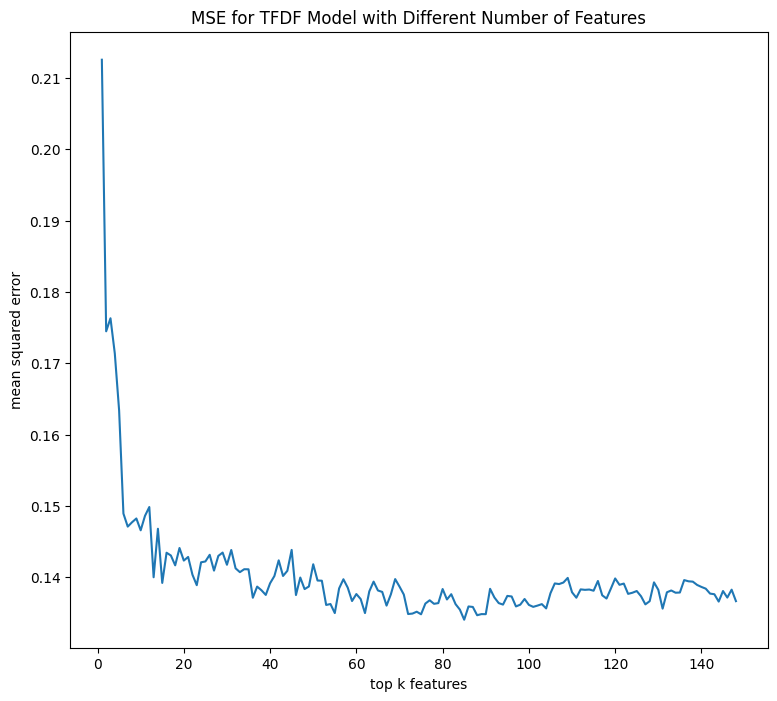

In [54]:
plt.figure(figsize=(9, 8))
plt.plot(features_num_, mses_)
plt.title('MSE for TFDF Model with Different Number of Features')
plt.xlabel('top k features')
plt.ylabel('mean squared error')